### 课题研究背景
<!-- **<font color=red>看看数据长什么样</font>**<br> -->

近年来，厦门市大规模基本建设的施工扬尘、机动车大幅度增长所排放的尾气及引起的道路扬尘等是空气中可吸入颗粒物浓度居高不下的主要原因。空气中的污染物也因风向、风速、降雨及低空逆温层等气象因素而扩散，灰霾天数有所增加。由于空气质量问题的日益严重，尤其是人流密集的公共场所例如BRT站点，火车站等人流聚集地空气质量更为堪忧。本课题通过对厦门市各区域的BRT站点、地铁、火车站、汽车站在不同时间段，不同天气情况进行PM2.5/PM10数据检测，采集实地数据值，通过数据分析研究厦门市公共交通空气污染特征，以便为城市空气质量的缓解乃至净化方案的推出起到一个数据支撑。

# 0.导入库

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime 
import warnings
from pylab import mpl
import pylab as pl
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"]#显示汉字
plt.rcParams["axes.unicode_minus"]=False
%matplotlib inline

# 1. 导入处理数据文件

## 1.1 导入卫生采集数据

In [2]:
!pwd

/Users/lin/Desktop/Air_detecting


In [3]:
os.chdir('/Users/lin/Desktop/Air_detecting/HT')

In [4]:
!ls

数据采集表0102_H.xlsx      数据采集表1207_T.xlsx
数据采集表0102_T.xlsx      数据采集表1209_T.xlsx
数据采集表0103_H.xlsx      数据采集表1211_T.xlsx
数据采集表0104_H.xlsx      数据采集表1213_T.xlsx
数据采集表0104_T.xlsx      数据采集表1218_H.xlsx
数据采集表0105_T.xlsx      数据采集表1219_H.xlsx
数据采集表0106_H.xlsx      数据采集表1220_H.xlsx
数据采集表0106_T.xlsx      数据采集表1220_T.xlsx
数据采集表0107_T.xlsx      数据采集表1221_H.xlsx
数据采集表0110_T.xlsx      数据采集表1221_T.xlsx
数据采集表0111_T.xlsx      数据采集表1223_T.xlsx
数据采集表0113_T.xlsx      数据采集表1224_H.xlsx
数据采集表0115_H.xlsx      数据采集表1224_T.xlsx
数据采集表0115_T.xlsx      数据采集表1225_H.xlsx
数据采集表0116_T.xlsx      数据采集表1226_T.xlsx
数据采集表0301_T.xlsx      数据采集表1227_H.xlsx
数据采集表0302_T.xlsx      数据采集表1228_H.xlsx
数据采集表0303_T.xlsx      数据采集表1229_H.xlsx
数据采集表0304_T.xlsx      数据采集表1229_T.xlsx
数据采集表0305_T.xlsx      数据采集表1231_H.xlsx
数据采集表1206_T.xlsx


In [5]:
filename = []
filename = !ls

In [6]:
h_files = []
n = 0
for file in filename:
    load_file = pd.read_excel(file,sheetname=0,header=1)
    n+=1
    h_files.append(load_file)
    print('第'+str(n)+'个表格已提取')

第1个表格已提取
第2个表格已提取
第3个表格已提取
第4个表格已提取
第5个表格已提取
第6个表格已提取
第7个表格已提取
第8个表格已提取
第9个表格已提取
第10个表格已提取
第11个表格已提取
第12个表格已提取
第13个表格已提取
第14个表格已提取
第15个表格已提取
第16个表格已提取
第17个表格已提取
第18个表格已提取
第19个表格已提取
第20个表格已提取
第21个表格已提取
第22个表格已提取
第23个表格已提取
第24个表格已提取
第25个表格已提取
第26个表格已提取
第27个表格已提取
第28个表格已提取
第29个表格已提取
第30个表格已提取
第31个表格已提取
第32个表格已提取
第33个表格已提取
第34个表格已提取
第35个表格已提取
第36个表格已提取
第37个表格已提取
第38个表格已提取
第39个表格已提取
第40个表格已提取
第41个表格已提取


In [7]:
data_result = pd.concat(h_files,ignore_index=True)

## 2. 对数据进行分类处理：machine  public

In [8]:
len(data_result)

6287

In [9]:
data_result.head()

,PM2.5,PM10,HCHO,VOC,PM2.5.1,PM10.1,O3,温度,湿度,污染指数,风向,风力,站点,类型,等级,区域,噪声,记录日期,记录时间,仪器型号
0,12,16,0.016,0.053,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,815,博朗通
1,8,15,0.048,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,816,博朗通
2,9,17,0.068,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,817,博朗通
3,11,17,0.077,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,818,博朗通
4,11,17,0.082,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,819,博朗通


### 剔除对数据分析无效数据
1. 未采集相关信息数据；
2. 对名称进行字母处理

剔除 **<font color=red >['等级','噪声','仪器型号']</font>**<br>

In [10]:
data = data_result.rename(columns={'温度':'Temp','湿度':'Humidity','污染指数':'AQI','风向':'Wind_Orient','风力':'Wind_Level',
                                '站点':'Location','类型':'Type','区域':'Zone','记录时间':'Time','记录日期':'Date'})
data = data.drop(['等级','噪声','仪器型号'],axis=1)

In [11]:
data.head()

,PM2.5,PM10,HCHO,VOC,PM2.5.1,PM10.1,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,Location,Type,Zone,Date,Time
0,12,16,0.016,0.053,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,815
1,8,15,0.048,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,816
2,9,17,0.068,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,817
3,11,17,0.077,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,818
4,11,17,0.082,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,819


### 对集合数据进行`测试数据`和`发布数据`划分

In [12]:
machine_columns = ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp',
       'Humidity', 'AQI', 'Wind_Orient', 'Wind_Level', 'Location', 'Type',
       'Zone', 'Date','Time']
public_columns = ['PM2.5.1', 'PM10.1', 'HCHO', 'VOC',  'O3', 'Temp',
       'Humidity', 'AQI', 'Wind_Orient', 'Wind_Level', 'Location', 'Type',
       'Zone', 'Date','Time']


machine = data[machine_columns]
public = data[public_columns]


machine['Info_source'] = 'device'# Tag Info as 1 if it come from device
public['Info_source'] = 'public' # Tag Info as 0 if it come from public
public = public.rename(columns={'PM2.5.1':'PM2.5','PM10.1':'PM10'})

In [13]:
data_df = pd.concat(objs=[machine,public],ignore_index=True)

In [14]:
len(data_df)

12574

In [15]:
data_df.head()

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,Location,Type,Zone,Date,Time,Info_source
0,12,16,0.016,0.053,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,815,device
1,8,15,0.048,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,816,device
2,9,17,0.068,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,817,device
3,11,17,0.077,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,818,device
4,11,17,0.082,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,819,device


# 3.数据划分

## 3.1. PM2.5 和温度  等级划分

### 空气质量“良”，也是一种伤害？| 观点(文章来源：知识分子)

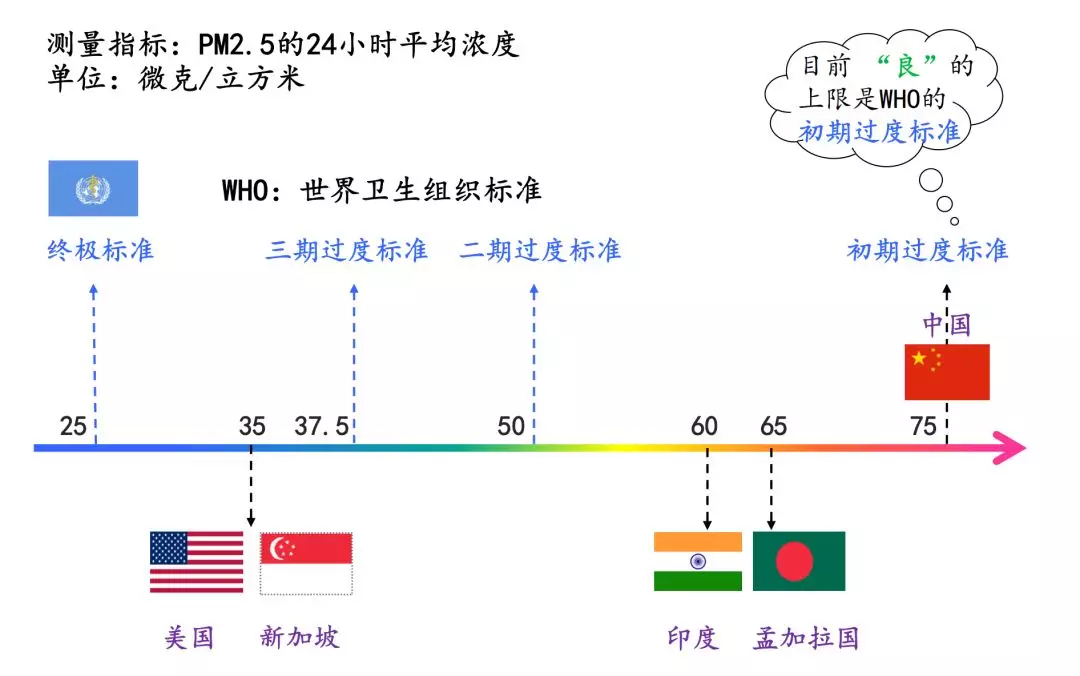

### 参考上表，我们将PM2.5数据进行4个等级的划分，分别为['Good','Mid','Bad','Terrible']；['under','above']
### 同样，温度按照[0,10,20,30]进行划分

In [16]:
# PM2.5划分等级
bins = [0,35,50,75,999]
labels = ['Good','Mid','Bad','Terrible']
data_df['PM2.5_level'] = pd.cut(data_df['PM2.5'],bins,labels=labels)

bins=[0,10,20,30]
data_df['Temp_Level'] = pd.cut(data_df['Temp'],bins)

bins=[0,35,999]
labels = ['under','above']
data_df['PM2.5_threshold'] = pd.cut(data_df['PM2.5'],bins,labels=labels)

In [17]:
data_df.head()

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,Location,Type,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold
0,12,16,0.016,0.053,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,815,device,Good,"(10, 20]",under
1,8,15,0.048,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,816,device,Good,"(10, 20]",under
2,9,17,0.068,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,817,device,Good,"(10, 20]",under
3,11,17,0.077,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,818,device,Good,"(10, 20]",under
4,11,17,0.082,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,819,device,Good,"(10, 20]",under


## 3.2 划分时间（早、中、晚）（周末、平时）
由于我们需要全面了解每个站点区域的空气质量变化情况，早期测量时按照早、中、晚三个时间区间进行数据采集，所以，根据采集记录的时间，划分出早、中、晚

In [18]:
"""不同时段（morning、noon、night）、Week (Mon,Tur...) 划分工作日与周末两种类型，再划分早、中、晚三个测量时间段"""
"""创建工作日列表和周末列表"""
"""工作日列表"""
Dayonwork = pd.bdate_range('2018-12-4','2019-4-20', freq='C').astype(str).tolist()
# pd.bdate_range('2018-12-4','2019-5-4', freq='D')


"""周末列表"""
weekmask = 'Sun Sat'
custombday = pd.offsets.CustomBusinessDay(weekmask=weekmask)
Dayoffwork =pd.bdate_range('2018-12-4','2019-4-20', freq=custombday).astype(str).tolist()

"""morning：7：30:00-9：45:00"""
start1 = pd.Timestamp(2018, 12, 21,6,30)
end1 = pd.Timestamp(2018,12,21,10,30)#6：30到10：30为上午
morning = pd.date_range(start1, end1, freq='min')
morning = morning.astype(str).str.split(' ',expand=True).tolist()

start2 = pd.Timestamp(2018, 12, 21,11,30)
end2 = pd.Timestamp(2018,12,21,16,30)#11：30到16：30为中午
noon = pd.date_range(start2, end2, freq='min')
noon = noon.astype(str).str.split(' ',expand=True).tolist()


start3 = pd.Timestamp(2018, 12, 21,16,30)
end3 = pd.Timestamp(2018,12,21,21,30)#16：30到21：30为晚上
night = pd.date_range(start3, end3, freq='min')
night = night.astype(str).str.split(' ',expand=True).tolist()

clocks1 = []
for i in range(len(morning)):
#     print(i)
    clock = list(morning[i])[1]
    clocks1.append(clock)
    

clocks2 = []
for i in range(len(noon)):
#     print(i)
    clock = list(noon[i])[1]
    clocks2.append(clock)


clocks3 = []
for i in range(len(night)):
#     print(i)
    clock = list(night[i])[1]
    clocks3.append(clock)
    

rq = data_df['Date']
sj = data_df['Time']
sjz = []
for i in range(len(sj)):
    s = sj[i].astype(str)
    shi = datetime.strptime(s, '%H%M')# 根据字符串本身的格式进行转换
    sjz.append(shi.strftime('%H:%M:%S'))
    

rqz = []
for i in range(len(rq)):
    r = rq[i].astype(str)
    ri = datetime.strptime(r, '%Y%m%d')# 根据字符串本身的格式进行转换
    rqz.append(ri.strftime('%Y-%m-%d'))    
    
data_df['Date']= rqz
data_df['Time']= sjz
"""--------------------------------------------"""
Time_tags = []
for i in range(len(data_df['Time'])):
    if data_df['Time'][i] in clocks1:
        Time_tags.append('Morning')
    elif data_df['Time'][i] in clocks2:
        Time_tags.append('Noon')
    else:
        Time_tags.append('Night')
    
Day_tags = []
for i in range(len(data_df['Date'])):
    if data_df['Date'][i] in Dayoffwork:
        Day_tags.append('R')
    else:
        Day_tags.append('W')
"""--------------------------------------------"""        
data_df['Time_Tags'] = Time_tags
data_df['Day_tags']=Day_tags

## 3.3 测试点汇总集合

In [19]:
data_df.head()

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Type,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags,Day_tags
0,12,16,0.016,0.053,51,13,71,15,东北风,4,...,卫生,思明,2019-01-02,08:15:00,device,Good,"(10, 20]",under,Morning,W
1,8,15,0.048,0,51,13,71,15,东北风,4,...,卫生,思明,2019-01-02,08:16:00,device,Good,"(10, 20]",under,Morning,W
2,9,17,0.068,0,51,13,71,15,东北风,4,...,卫生,思明,2019-01-02,08:17:00,device,Good,"(10, 20]",under,Morning,W
3,11,17,0.077,0,51,13,71,15,东北风,4,...,卫生,思明,2019-01-02,08:18:00,device,Good,"(10, 20]",under,Morning,W
4,11,17,0.082,0,51,13,71,15,东北风,4,...,卫生,思明,2019-01-02,08:19:00,device,Good,"(10, 20]",under,Morning,W


In [20]:
data_df.Location.unique()

array(['厦门眼科中心医院', '火车站乘车1', '火车站乘车2', '火车站进站', '梧村汽车站', '厦门站出站口',
       '厦门站售票厅', '厦门市第三医院', '厦门市同安区中医院', '文灶站乘车1', '文灶站乘车2', '文灶站进站',
       '二市站乘车1', '二市站乘车2', '二市站进站', '斗西路站乘车1', '斗西路站乘车2', '斗西路站进站',
       '厦门北站售票厅', '厦门北站进站口', '厦门北站出站口', 'BRT厦门北站出站', 'BRT厦门北站进站',
       '厦门市同安区大嶝医院', '嘉庚体育馆乘车1', '嘉庚体育馆乘车2', '嘉庚体育馆进站', '思北站乘车1',
       '思北站乘车2', '思北站进站', '第一码头乘车', '第一码头进站', '开禾路口站乘车1', '开禾路口站乘车2',
       '开禾路口站进站', '官任站进站', '官任站乘车', '吕厝站乘车', '吕厝站进站', '金山站乘车1', '金山站乘车2',
       '金山站进站', '市行政服务中心站乘车1', '市行政服务中心站乘车2', '市行政服务中心站进站', '龙山桥站乘车1',
       '龙山桥乘车2', '龙山桥进站', '莲坂站乘车1', '莲坂站乘车2', '莲坂站进站', '厦门市第五医院',
       '前埔枢纽站进站', '前埔枢纽站乘车', '洪文站乘车1', '洪文站乘车2', '洪文站进站', '卧龙晓城站乘车1',
       '卧龙晓城站乘车2', '卧龙晓城站进站', '东芳山庄站乘车1', '东芳山庄站乘车2', '东芳山庄站进站', '蔡塘站乘车1',
       '蔡塘站乘车2', '蔡塘站进站', '第一码头站乘车', '第一码头站进站', '厦门站进站口', '龙山桥站乘车2',
       '龙山桥站进站', '前埔站进站', '前埔站乘车', '县后站乘车1', '县后站乘车2', '县后站进站',
       '双十中学站乘车1', '双十中学站乘车2', '双十中学站进站', '嘉庚体育馆站乘车1', '嘉庚体育馆站乘车2',
       '嘉庚体育馆站进站', '火车厦门北站进站', '火车厦门

### 站点合并解释
早期设计数据采集时，猜想安检口、候车站台空气质量数据会呈现出较大差别，而根据早期采集回来的数据结果显示，没有明显的数据统计特征支持

而这部分内容，即不同功能区域、交通站点不同区域测点又写入各自的开题报告中，所以我们采取以下方式
1. 统一合并处理同一站点不同测试位置
2. 选择某个站点进行安检口、进站口和出站口数据分析，得出没有差别的结论，就此支持我们上一条的数据处理方法

In [21]:
#将各式称呼进行统一化处理：
title_Dict = {}
title_Dict.update(dict.fromkeys(['火车站乘车1', '火车站乘车2', '火车站进站'], '火车站'))
title_Dict.update(dict.fromkeys(['梧村汽车站', '梧村长途汽车站'], '梧村汽车站'))
title_Dict.update(dict.fromkeys(['厦门站出站口', '厦门站售票厅','厦门站出站', '厦门站售票', '厦门站进站'], '厦门站'))
title_Dict.update(dict.fromkeys(['文灶站乘车1', '文灶站乘车1','文灶站进站','文灶站乘车2','文灶站乘车2'], '文灶'))
title_Dict.update(dict.fromkeys(['斗西路站乘车1','斗西路站乘车2','斗西路进站'], '斗西路'))
title_Dict.update(dict.fromkeys(['厦门北站售票厅','厦门北站进站口', '厦门北站出站口','火车厦门北站进站','火车厦门北站售票', '火车厦门北站出站'], '厦门北站'))
title_Dict.update(dict.fromkeys(['BRT厦门北站出站', 'BRT厦门北站进站'], '厦门北'))
title_Dict.update(dict.fromkeys(['嘉庚体育馆乘车1','嘉庚体育馆站进站','嘉庚体育馆站乘车1', '嘉庚体育馆乘车2', '嘉庚体育馆站乘车2','嘉庚体育馆进站'], '嘉庚体育馆'))
title_Dict.update(dict.fromkeys(['思北站乘车1', '思北站乘车2', '思北站进站'], '思北站'))
title_Dict.update(dict.fromkeys([ '第一码头乘车', '第一码头进站'], '第一码头站'))
title_Dict.update(dict.fromkeys(['开禾路口站乘车1', '开禾路口站乘车2', '开禾路口站进站'], '开禾路口'))
title_Dict.update(dict.fromkeys(['官任站进站','官任站乘车'], '官任'))
title_Dict.update(dict.fromkeys(['吕厝站乘车', '吕厝站进站'], '吕厝'))
title_Dict.update(dict.fromkeys(['金山站乘车1', '金山站乘车2', '金山站进站'], '金山'))
title_Dict.update(dict.fromkeys(['市行政服务中心站乘车1', '市行政服务中心站乘车2', '市行政服务中心站进站'], '市行政服务中心'))
title_Dict.update(dict.fromkeys(['龙山桥站乘车1', '龙山桥乘车2','龙山桥进站','龙山桥站乘车2', '龙山桥站进站'], '龙山桥'))
title_Dict.update(dict.fromkeys(['莲坂站乘车1', '莲坂站乘车2', '莲坂站进站'], '莲坂'))
title_Dict.update(dict.fromkeys(['前埔枢纽站进站','前埔枢纽站乘车','前埔站乘车'], '前埔'))
title_Dict.update(dict.fromkeys(['洪文站乘车1', '洪文站乘车2', '洪文站进站'], '洪文'))
title_Dict.update(dict.fromkeys(['卧龙晓城站乘车1', '卧龙晓城站乘车2','卧龙晓城站进站'], '卧龙晓城'))
title_Dict.update(dict.fromkeys(['东芳山庄站乘车1', '东芳山庄站乘车2', '东芳山庄站进站'], '东芳山庄'))
title_Dict.update(dict.fromkeys(['蔡塘站乘车1', '蔡塘站乘车2','蔡塘站进站'], '蔡塘'))
title_Dict.update(dict.fromkeys(['双十中学站乘车1','双十中学站乘车2', '双十中学进站'], '双十中学'))
title_Dict.update(dict.fromkeys(['二市站乘车1','二市站乘车2', '二市站进站'], '二市'))
title_Dict.update(dict.fromkeys(['斗西路站乘车1', '斗西路站乘车2', '斗西路站进站'], '斗西路'))
title_Dict.update(dict.fromkeys(['官任站'], '官任'))
title_Dict.update(dict.fromkeys(['县后站乘车1', '县后站乘车2', '县后站进站'], '县后'))
title_Dict.update(dict.fromkeys(['西柯枢纽站乘车1', '西柯枢纽站乘车2', '西柯枢纽站进站'], '西柯'))
title_Dict.update(dict.fromkeys(['枋湖客运中心'], '枋湖客运中心'))
"""-------------------------------------------"""
title_Dict.update(dict.fromkeys(['厦门市第三医院'], '厦门市第三医院'))
title_Dict.update(dict.fromkeys(['厦门市同安区中医院'], '厦门市同安区中医院'))
title_Dict.update(dict.fromkeys(['厦门市同安区大嶝医院'], '厦门市同安区大嶝医院'))
title_Dict.update(dict.fromkeys(['厦门市第二医院门诊', '厦门市第二医院三号楼'], '厦门市第二医院'))
title_Dict.update(dict.fromkeys(['厦门市第一医院杏林分院'], '厦门市第一医院杏林分院'))
title_Dict.update(dict.fromkeys(['厦门市第一医院'], '厦门市第一医院'))
title_Dict.update(dict.fromkeys(['厦门市中医院'], '厦门市中医院'))
title_Dict.update(dict.fromkeys(['厦门市集美区灌口医院'], '厦门市集美区灌口医院'))
title_Dict.update(dict.fromkeys(['厦门市中山医院'], '厦门市中山医院'))
title_Dict.update(dict.fromkeys(['厦门市妇幼保健院'], '厦门市妇幼保健院'))
title_Dict.update(dict.fromkeys(['解放军第一七四医院'], '解放军第一七四医院'))
title_Dict.update(dict.fromkeys(['厦门口腔医院'],'厦门口腔医院'))
title_Dict.update(dict.fromkeys(['厦门市第五医院'],'厦门市第五医院'))
title_Dict.update(dict.fromkeys(['厦门眼科中心医院'],'厦门眼科中心医院'))

data_df['Title'] = data_df['Location'].map(title_Dict)

### 合并同类项后，统计下各个测点的数据量值

In [22]:
data_df['Title'].value_counts().to_frame()[::4]

,Title
厦门市第一医院,640
解放军第一七四医院,612
厦门市第一医院杏林分院,512
厦门市同安区中医院,296
市行政服务中心,270
斗西路,258
卧龙晓城,250
厦门市集美区灌口医院,196
厦门北,176
前埔,134


### 进行交通和卫生医院的数据划分：
#### data_df  
#### data_traffic  
#### data_hygiene

In [23]:
data_traffic = data_df[data_df['Type']=='交通']
data_hygiene = data_df[data_df['Type']=='卫生']

In [24]:
"""分别进行输出保存"""
os.chdir('/Users/lin/Desktop/Air_detecting')
os.makedirs('tmp', exist_ok=True)

In [25]:
data_df.to_csv('data_df.csv',encoding='utf_8_sig')
data_traffic.to_csv('data_traffic.csv',encoding='utf_8_sig')
data_hygiene.to_csv('data_hygiene.csv',encoding='utf_8_sig')

## 3.4交通、卫生与测量、发布数据的切分

In [59]:
traffic = data_df[data_df['Type']=='交通']
traffic_device = data_df[(data_df['Type']=='交通')&(data_df['Info_source']=='device')]
traffic_public = data_df[(data_df['Type']=='交通')&(data_df['Info_source']=='public')]
"""----------"""
hygiene = data_df[data_df['Type']=='卫生']
hygiene_device = data_df[(data_df['Type']=='卫生')&(data_df['Info_source']=='device')]
hygiene_public = data_df[(data_df['Type']=='卫生')&(data_df['Info_source']=='public')]

In [60]:
print(len(traffic_device[(traffic_device['PM2.5']>=35)]))#测试设备测得的交通PM2.5数值大于35的数量
print(len(traffic_device[(traffic_device['PM2.5']<35)]))#测试设备测得的交通PM2.5数值小于35的数量
print(len(traffic_public[(traffic_public['PM2.5']>=35)]))
print(len(traffic_public[(traffic_public['PM2.5']<35)]))

2219
666
1117
1768


Text(0.5, 0, 'Traffic Air Test Quality')

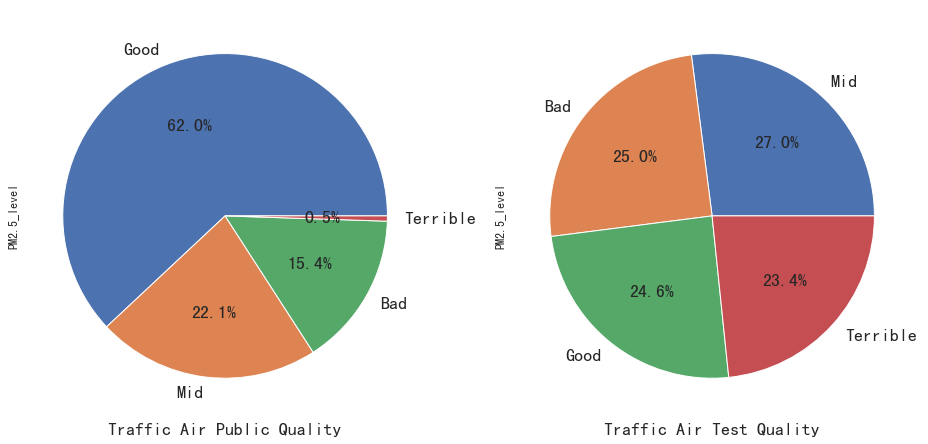

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(121)
traffic_public['PM2.5_level'].value_counts().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('Traffic Air Public Quality',fontsize=18)
plt.subplot(122)
traffic_device['PM2.5_level'].value_counts().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('Traffic Air Test Quality',fontsize=18)

Text(0.5, 0, 'Hygiene Air Test Quality')

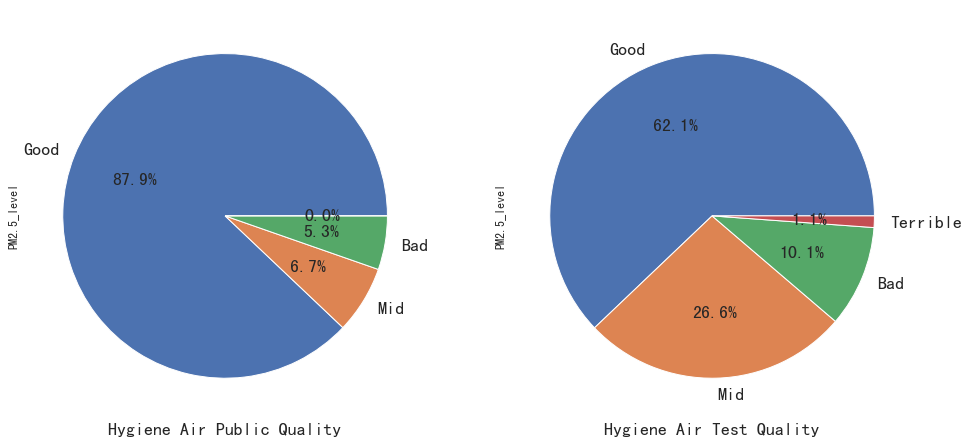

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(121)
hygiene_public['PM2.5_level'].value_counts().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('Hygiene Air Public Quality',fontsize=18)
plt.subplot(122)
hygiene_device['PM2.5_level'].value_counts().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('Hygiene Air Test Quality',fontsize=18)

In [63]:
print("卫生系统：发布数据@空气质量")
hygiene_public['PM2.5_level'].value_counts().to_frame()

卫生系统：发布数据@空气质量


,PM2.5_level
Good,2991
Mid,229
Bad,182
Terrible,0


In [64]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12574 entries, 0 to 12573
Data columns (total 22 columns):
PM2.5              12574 non-null int64
PM10               12574 non-null int64
HCHO               12574 non-null float64
VOC                12574 non-null object
O3                 12574 non-null object
Temp               12574 non-null int64
Humidity           12574 non-null int64
AQI                12574 non-null int64
Wind_Orient        12574 non-null object
Wind_Level         12574 non-null object
Location           12574 non-null object
Type               12574 non-null object
Zone               12574 non-null object
Date               12574 non-null object
Time               12574 non-null object
Info_source        12574 non-null object
PM2.5_level        12574 non-null category
Temp_Level         12574 non-null category
PM2.5_threshold    12574 non-null category
Time_Tags          12574 non-null object
Day_tags           12574 non-null object
Title              12328 non

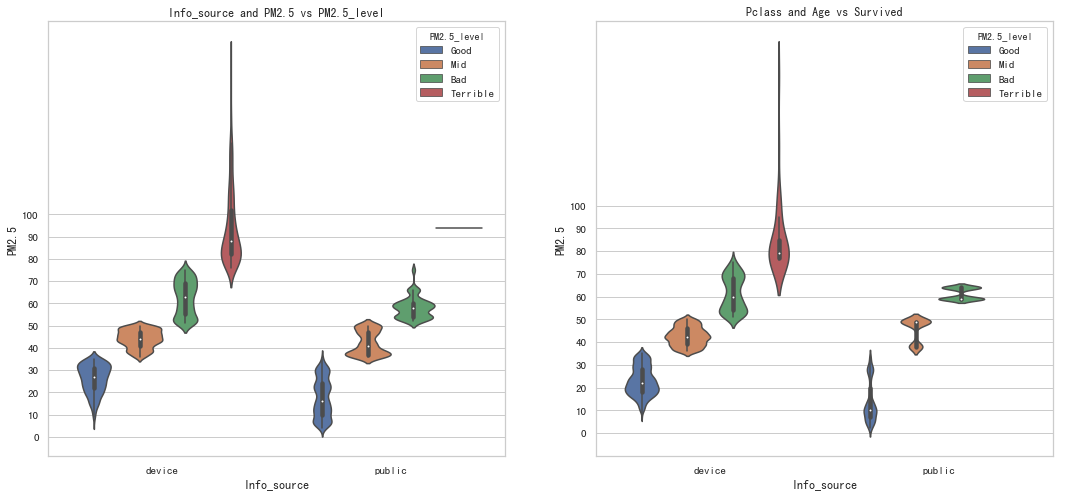

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Info_source", "PM2.5", hue="PM2.5_level", data=traffic, ax=ax[0])
ax[0].set_title('Info_source and PM2.5 vs PM2.5_level')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Info_source", "PM2.5", hue="PM2.5_level", data=hygiene, ax=ax[1])
ax[1].set_title('Pclass and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

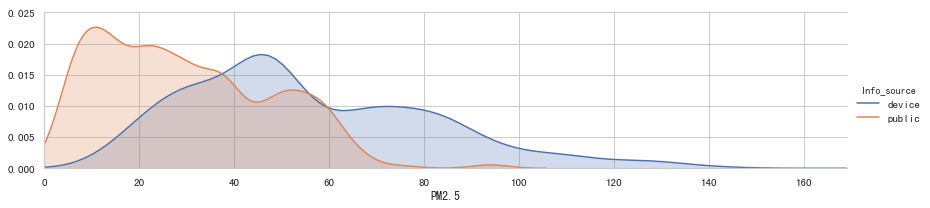

In [66]:
facet = sns.FacetGrid(traffic,hue='Info_source',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,traffic['PM2.5'].max()))
facet.set(ylim=(0,0.025))
facet.add_legend()

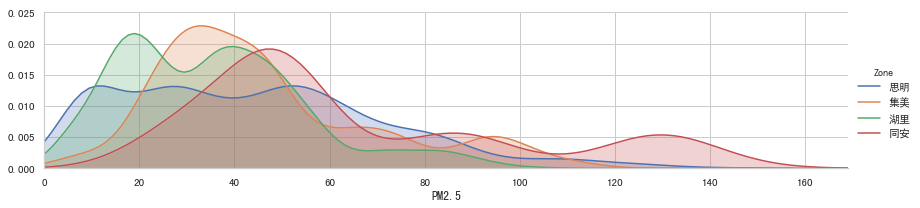

In [67]:
facet = sns.FacetGrid(traffic,hue='Zone',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,traffic['PM2.5'].max()))
facet.set(ylim=(0,0.025))
facet.add_legend()

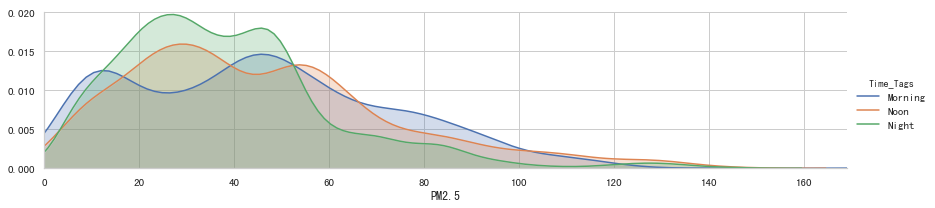

In [68]:
facet = sns.FacetGrid(traffic,hue='Time_Tags',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,traffic['PM2.5'].max()))
facet.set(ylim=(0,0.020))
facet.add_legend()

Text(0.5, 1.0, '交通：不同数据源不同时间段下PM2.5平均值对比')

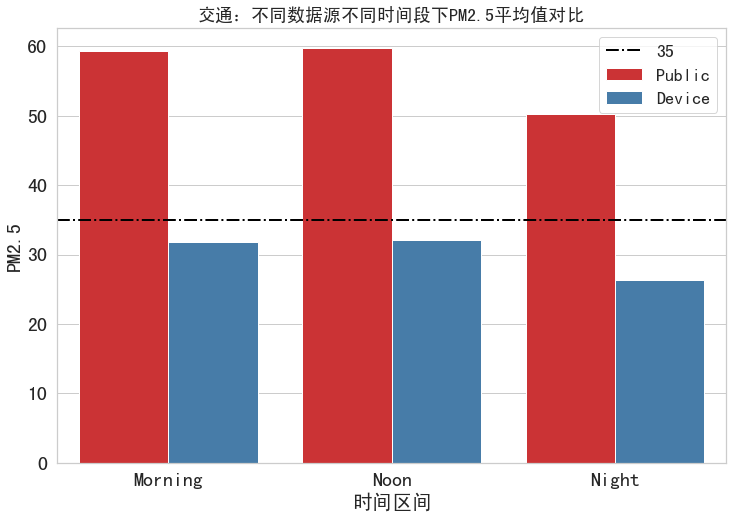

In [69]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
# plt.grid(linestyle="--")
# av = traffic[["PM2.5", "Time_Tags"]].groupby(['Time_Tags'],as_index=False).mean()
ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Info_source',data = traffic,order=['Morning','Noon','Night'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_xlabel("Time_episode",fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
plt.title('交通：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

Text(0.5, 1.0, '卫生：不同数据源不同时间段下PM2.5平均值对比')

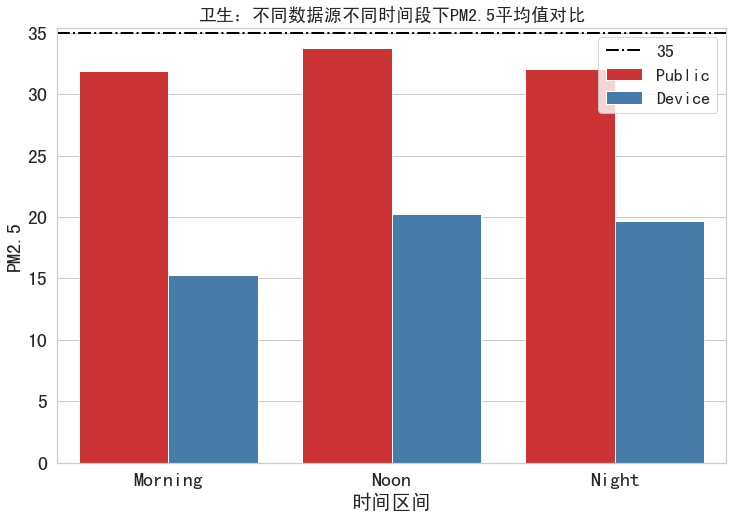

In [70]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Info_source',data = hygiene,order=['Morning','Noon','Night'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
plt.title('卫生：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

Text(0.5, 1.0, '卫生：不同数据源不同时间段下PM2.5平均值对比')

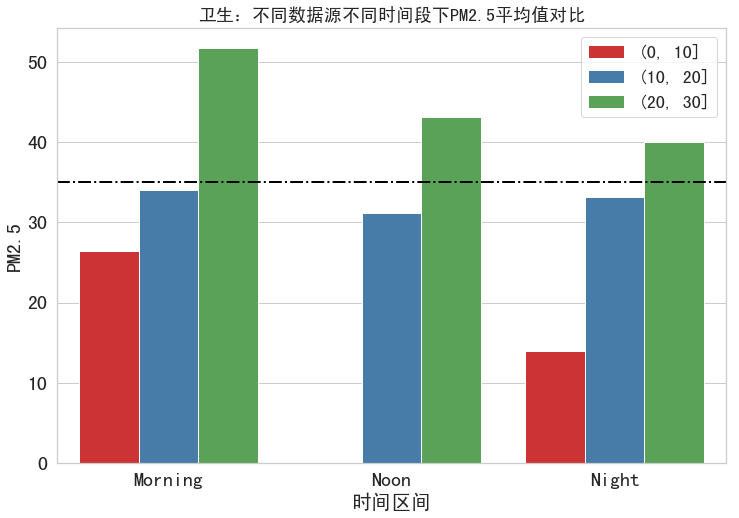

In [71]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Temp_Level',data = data_df,order=['Morning','Noon','Night'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend(fontsize=18)
plt.title('卫生：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

In [72]:
data_df.columns

Index(['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'Location', 'Type', 'Zone', 'Date', 'Time',
       'Info_source', 'PM2.5_level', 'Temp_Level', 'PM2.5_threshold',
       'Time_Tags', 'Day_tags', 'Title'],
      dtype='object')

## 数据特征分布研究

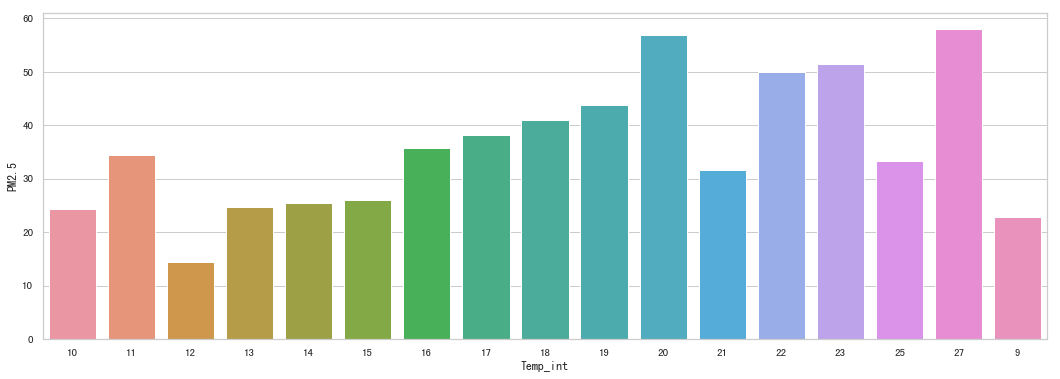

In [73]:
"""不同温度下，对应的PM2.5数值浓度@全数据"""
fig,axis1 = plt.subplots(1,1,figsize=(18,6))
data_df['Temp_int'] = data_df['Temp'].astype(str)
average_value = data_df[['Temp_int','PM2.5']].groupby('Temp_int',as_index=False).mean()
sns.barplot('Temp_int','PM2.5',data=average_value)

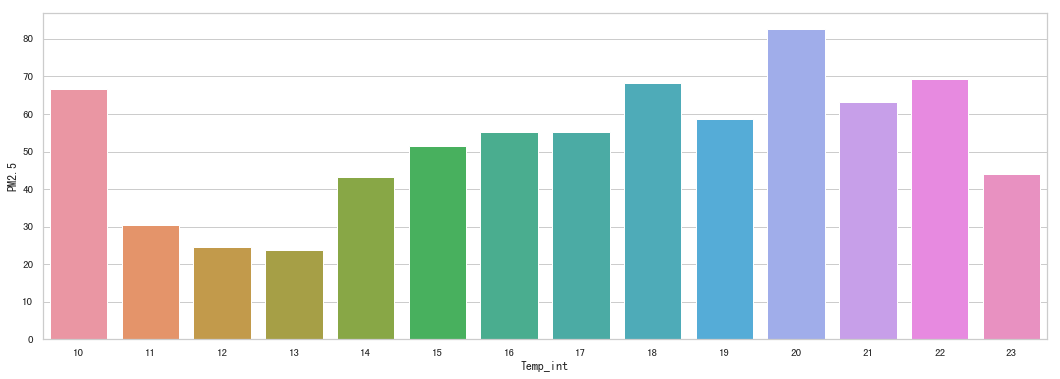

In [74]:
fig,axis1 = plt.subplots(1,1,figsize=(18,6))
traffic_device['Temp_int'] = data_df['Temp'].astype(str)
average_value = traffic_device[['Temp_int','PM2.5']].groupby('Temp_int',as_index=False).mean()
sns.barplot('Temp_int','PM2.5',data=average_value)

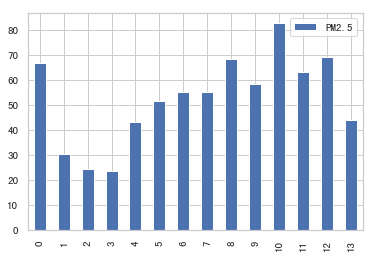

In [75]:
average_value.plot(kind='bar')

In [76]:
data_df[['Type','Zone']].groupby('Zone').count()

,Type
Zone,
同安,1248
思明,6648
湖里,2128
翔安,634
集美,1916


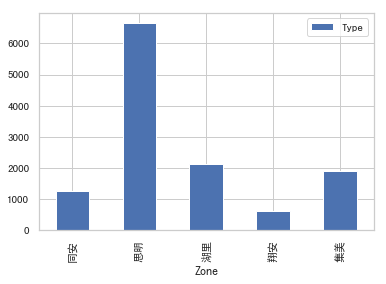

In [77]:
data_df[['Type','Zone']].groupby('Zone').count().plot.bar()

### 统计思明区交通站点的数量比率

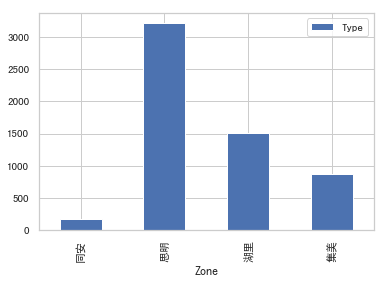

In [78]:
traffic[['Type','Zone']].groupby('Zone').count().plot.bar()

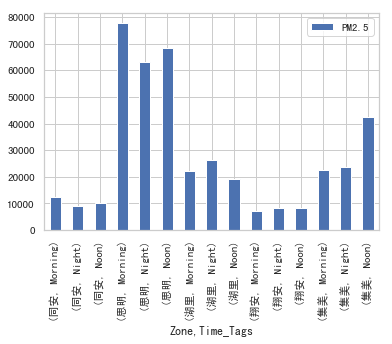

In [79]:
data_df[['Zone','PM2.5','Time_Tags']].groupby(['Zone','Time_Tags']).sum().plot.bar()

In [80]:
data_df[['Type','Zone']].groupby(['Type']).count()

,Zone
Type,
交通,5770
卫生,6804


In [81]:
data_df[['Type','Zone']].groupby(['Zone']).count()

,Type
Zone,
同安,1248
思明,6648
湖里,2128
翔安,634
集美,1916


In [82]:
data_df[['Type','Zone','PM2.5']].groupby(['Zone','Type']).count()

PM2.5
Zone Type       
同安   交通      180
     卫生     1068
思明   交通     3210
     卫生     3438
湖里   交通     1502
     卫生      626
翔安   卫生      634
集美   交通      878
     卫生     1038

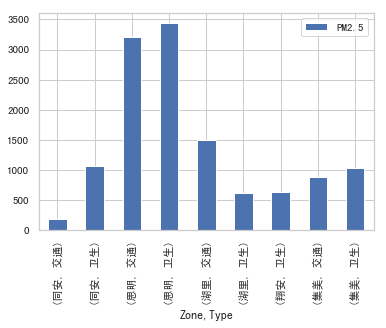

In [83]:
data_df[['Type','Zone','PM2.5']].groupby(['Zone','Type']).count().plot.bar()

In [84]:
data_df[['Type','Zone','PM2.5']].groupby(['Zone','Type']).count()

PM2.5
Zone Type       
同安   交通      180
     卫生     1068
思明   交通     3210
     卫生     3438
湖里   交通     1502
     卫生      626
翔安   卫生      634
集美   交通      878
     卫生     1038

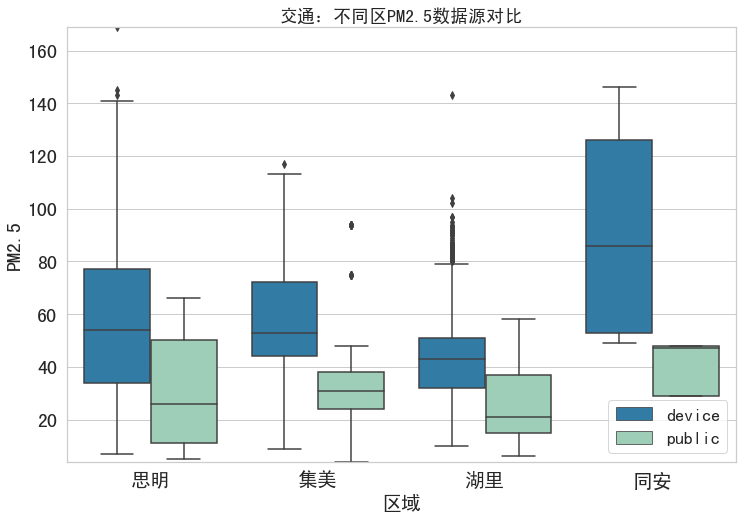

In [85]:
plt.figure(figsize=(12,8))
ax = sns.boxplot('Zone','PM2.5',hue='Info_source',data=traffic, palette="YlGnBu_r")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区PM2.5数据源对比',fontsize=18)
ax.set_xlabel("区域",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
ax.legend(fontsize=18)

plt.margins(0,0)
# plt.savefig('btq.jpg',dpi=400,pad_inches = 0,bbox_inches = 'tight')
# plt.savefig('交通：不同区PM2.5数据源对比.jpg',dpi=400)

Text(0.5, 1.0, '不同数据源与时段下PM2.5分布')

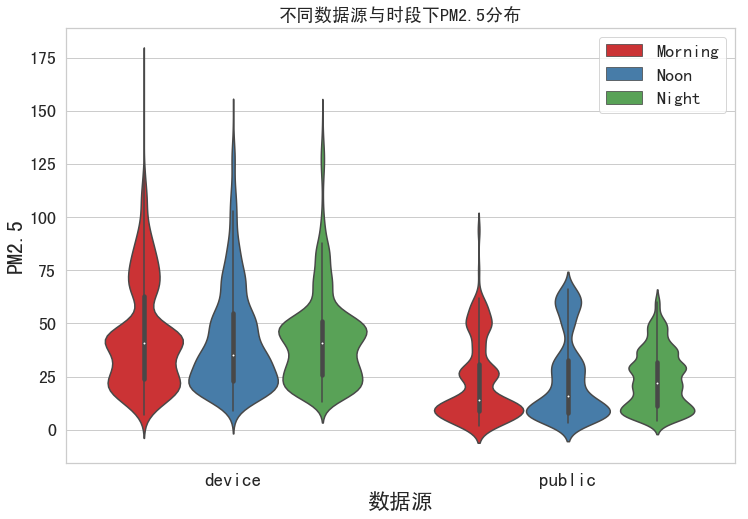

In [86]:
"""不同数据源与时段下PM2.5分布"""
plt.rcParams["font.sans-serif"]=["SimHei"] #用来正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False #用来正常显示负号
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='Info_source',y='PM2.5',data=data_df,hue='Time_Tags',palette='Set1')
plt.xticks(fontsize=19)
plt.yticks(fontsize=18)
plt.xlabel('数据源',fontsize=22)
plt.ylabel('PM2.5',fontsize=22)
plt.legend(fontsize=18)
plt.title('不同数据源与时段下PM2.5分布',fontsize=18)
# plt.savefig('不同数据源与时段下PM2.5分布.jpg',dpi=400)

# 区域个例分析

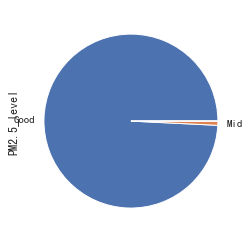

In [87]:
sample1 = hygiene[hygiene.Location=='厦门市第一医院']
sample1['PM2.5_level'].value_counts().plot.pie()

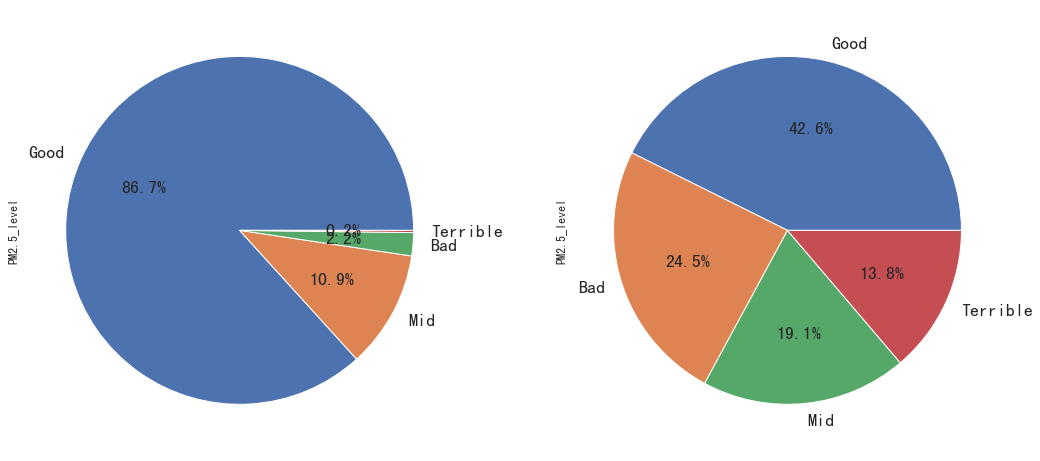

In [88]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sample1 = hygiene[hygiene.Zone=='思明']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)
plt.subplot(122)
sample1 = traffic[traffic.Zone=='思明']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)

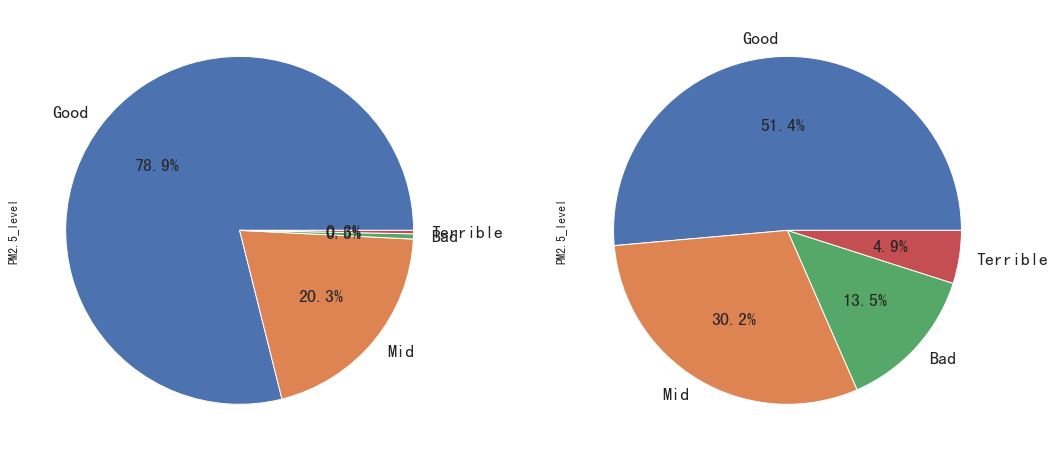

In [89]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sample1 = hygiene[hygiene.Zone=='湖里']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)
plt.subplot(122)
sample1 = traffic[traffic.Zone=='湖里']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)

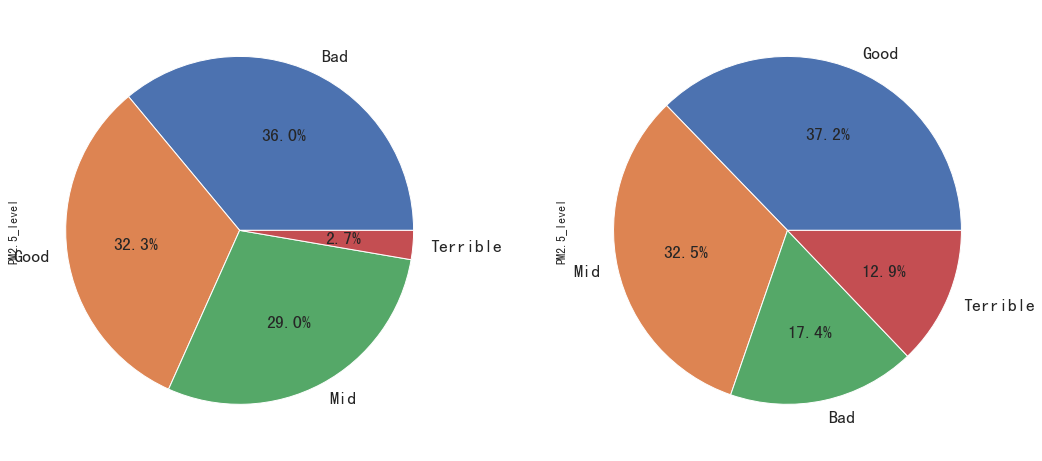

In [90]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sample1 = hygiene[hygiene.Zone=='集美']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)
plt.subplot(122)
sample1 = traffic[traffic.Zone=='集美']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)

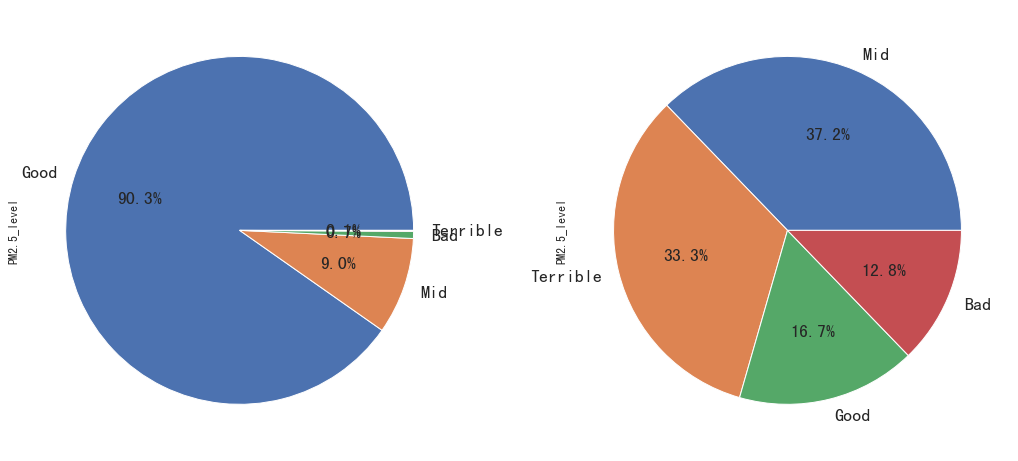

In [91]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sample1 = hygiene[hygiene.Zone=='同安']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)
plt.subplot(122)
sample1 = traffic[traffic.Zone=='同安']
sample1['PM2.5_level'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=18)

In [92]:
"""设备检测方面，测得PM2.5浓度大于35的数据个数"""
# hygiene_device_above35_index = hygiene[(hygiene['PM2.5']>35)&(hygiene['Info_source']==1)].Location.value_counts().index
# hygiene_device_above35_index
# type(hygiene_device_above35_count)

'设备检测方面，测得PM2.5浓度大于35的数据个数'

In [93]:
hygiene_device_above35 = hygiene[["PM2.5", "PM2.5_threshold",'Title']].groupby(['PM2.5_threshold','Title'],as_index=False).mean()[14:]
hygiene_device_above35['PM2.5'] = hygiene_device_above35['PM2.5'].fillna(0) 
hygiene_device_above35 = hygiene_device_above35.sort_values(by='PM2.5',ascending=False)

Text(0.5, 0, '医院名称')

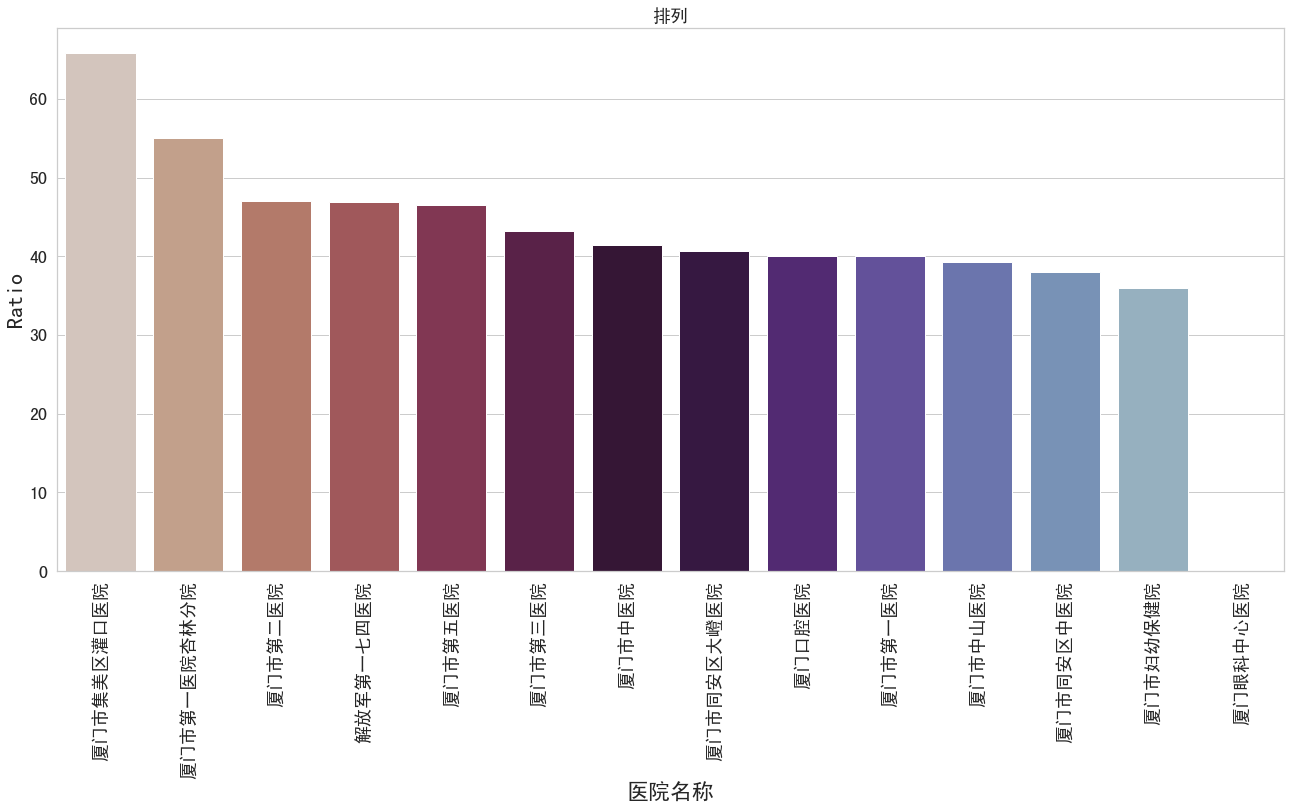

In [94]:
plt.figure(figsize=(22,10))
x= hygiene_device_above35['Title']
y = hygiene_device_above35['PM2.5']
sns.barplot(x,y,palette='twilight_r')
plt.yticks(fontsize=18)
plt.ylabel('Ratio',fontsize=22)
plt.xticks(fontsize=18)
plt.title('排列',fontsize=18)
pl.xticks(rotation=90)
plt.xlabel('医院名称',fontsize=22)
# plt.savefig('')

In [95]:
"""统计交通站点PM2.5 """
traffic_device_above35 = traffic[["PM2.5", "PM2.5_threshold",'Title']].groupby(['PM2.5_threshold','Title'],as_index=False).mean()[14:]
traffic_device_above35['PM2.5'] = traffic_device_above35['PM2.5'].fillna(0) 
traffic_device_above35 = traffic_device_above35.sort_values(by='PM2.5',ascending=False)

In [96]:
traffic_device_above35 = traffic_device_above35[:20]

In [97]:
traffic_device_above35.reset_index()

,index,PM2.5_threshold,Title,PM2.5
0,51,above,西柯,72.726667
1,41,above,思北站,71.106383
2,43,above,斗西路,67.057018
3,28,above,二市,66.425439
4,49,above,莲坂,64.496774
5,30,above,卧龙晓城,64.350877
6,46,above,洪文,63.851240
7,53,above,龙山桥,62.096774
8,37,above,嘉庚体育馆进,61.653179
9,32,above,厦门北站,61.629032


In [98]:
traffic_device_above35 = traffic[["PM2.5", "PM2.5_threshold",'Title']].groupby(['Title'],as_index=False).mean()
traffic_device_above35 = traffic_device_above35.sort_values(by='PM2.5',ascending=False)

In [99]:
traffic_device_above35 = traffic_device_above35[::-1]

Text(0.5, 0, 'BRT站点')

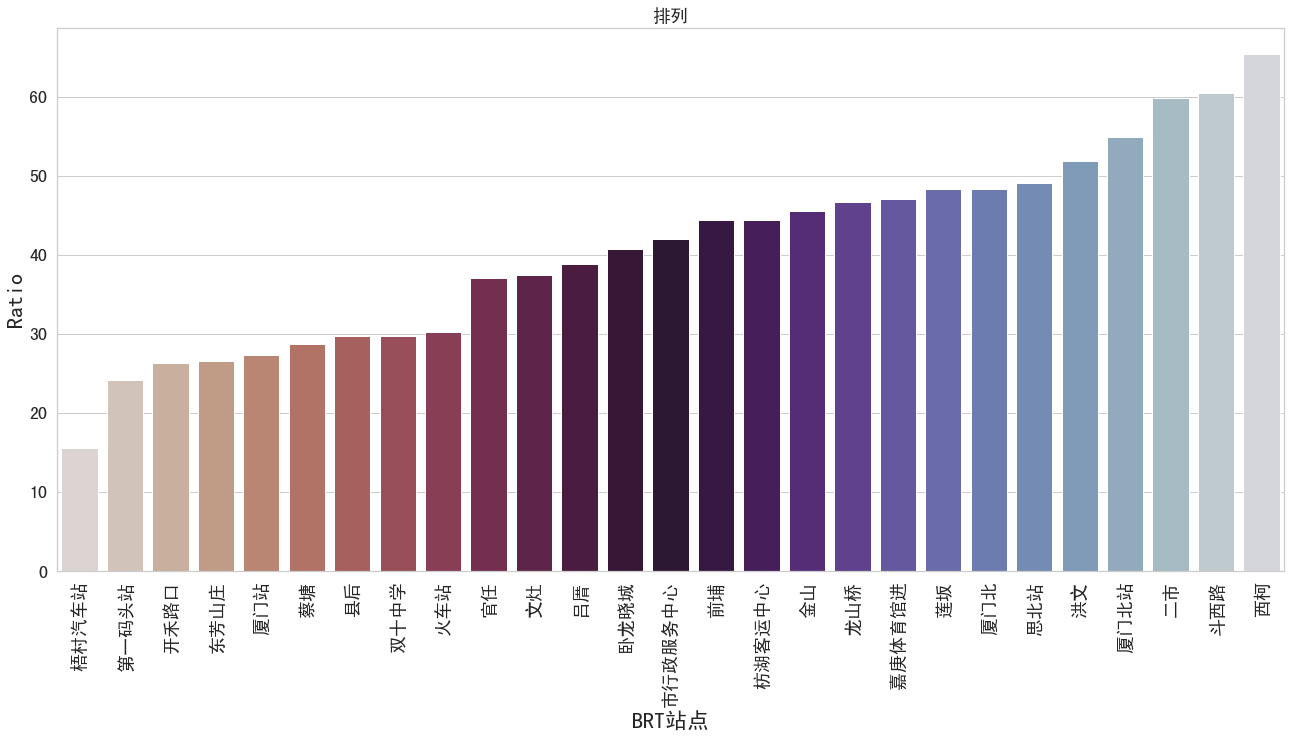

In [100]:
plt.figure(figsize=(22,10))
x= traffic_device_above35['Title']
y = traffic_device_above35['PM2.5']
sns.barplot(x,y,ci=None,palette='twilight_r')
plt.yticks(fontsize=18)
plt.ylabel('Ratio',fontsize=22)
plt.xticks(fontsize=18)
plt.title('排列',fontsize=18)
pl.xticks(rotation=90)
plt.xlabel('BRT站点',fontsize=22)
# plt.savefig('')

In [101]:
traffic.head()

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags,Day_tags,Title
268,30,45,0.000,0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:24:00,device,Good,"(10, 20]",under,Morning,W,火车站
269,22,30,0.002,0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:25:00,device,Good,"(10, 20]",under,Morning,W,火车站
270,27,36,0.028,0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:26:00,device,Good,"(10, 20]",under,Morning,W,火车站
271,23,35,0.018,0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:27:00,device,Good,"(10, 20]",under,Morning,W,火车站
272,19,30,0.023,0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:28:00,device,Good,"(10, 20]",under,Morning,W,火车站


In [102]:
hygiene_device_above35_timetags = hygiene[["PM2.5", "PM2.5_threshold",'Title','Time_Tags']].groupby(['PM2.5_threshold','Title','Time_Tags'],as_index=False).mean()[14:]
# hygiene_device_above35_timetags['PM2.5'][hygiene_device_above35_timetags['PM2.5'].isnull()] = hygiene_device_above35_timetags['PM2.5'].dropna().mode().values
"""以上操作，为对未采集地点及时段的PM2.5平均值进行众数填充，另一种肯能，则进行0值填充"""
hygiene_device_above35_timetags['PM2.5'] = hygiene_device_above35_timetags['PM2.5'].fillna(0) 
hygiene_device_above35_timetags  = hygiene_device_above35_timetags[42:]

In [103]:
hygiene_device_above35_timetags[hygiene_device_above35_timetags['Time_Tags']=='Morning'].sort_values(by='PM2.5')

,PM2.5_threshold,Title,Time_Tags,PM2.5
57,above,厦门市妇幼保健院,Morning,0.000000
69,above,厦门市第二医院,Morning,0.000000
75,above,厦门市集美区灌口医院,Morning,0.000000
78,above,厦门眼科中心医院,Morning,0.000000
60,above,厦门市第一医院,Morning,40.000000
72,above,厦门市第五医院,Morning,42.645833
66,above,厦门市第三医院,Morning,43.731707
81,above,解放军第一七四医院,Morning,45.027972
63,above,厦门市第一医院杏林分院,Morning,58.945312


In [104]:
hygiene_device_above35_timetags[hygiene_device_above35_timetags['Time_Tags']=='Noon'].sort_values(by='PM2.5')

,PM2.5_threshold,Title,Time_Tags,PM2.5
62,above,厦门市第一医院,Noon,0.000000
80,above,厦门眼科中心医院,Noon,0.000000
59,above,厦门市妇幼保健院,Noon,36.000000
56,above,厦门市同安区大嶝医院,Noon,36.142857
74,above,厦门市第五医院,Noon,44.824074
68,above,厦门市第三医院,Noon,45.000000
71,above,厦门市第二医院,Noon,48.633333
83,above,解放军第一七四医院,Noon,58.086957
65,above,厦门市第一医院杏林分院,Noon,58.095238
77,above,厦门市集美区灌口医院,Noon,65.770408


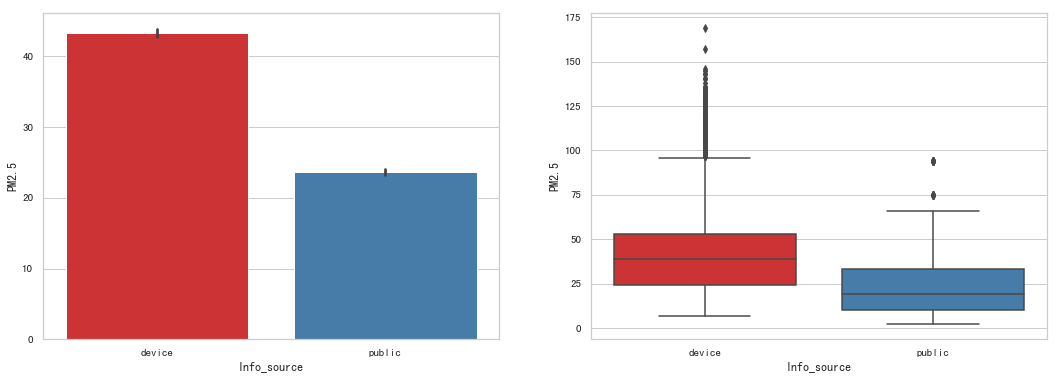

In [105]:
"""测量数据与发布数据的平均值比较"""
data_df_public = data_df[data_df['Info_source']=='public']
data_df_device = data_df[data_df['Info_source']=='device']
fig,ax=plt.subplots(1,2,figsize=(18,6))
sns.set_palette('Set1')
sns.barplot(x='Info_source',y='PM2.5',data=data_df,ax=ax[0])
sns.boxplot(x='Info_source',y='PM2.5',data=data_df,ax=ax[1])

Text(0.5, 1.0, '不同系统、数据源与PM2.5关系')

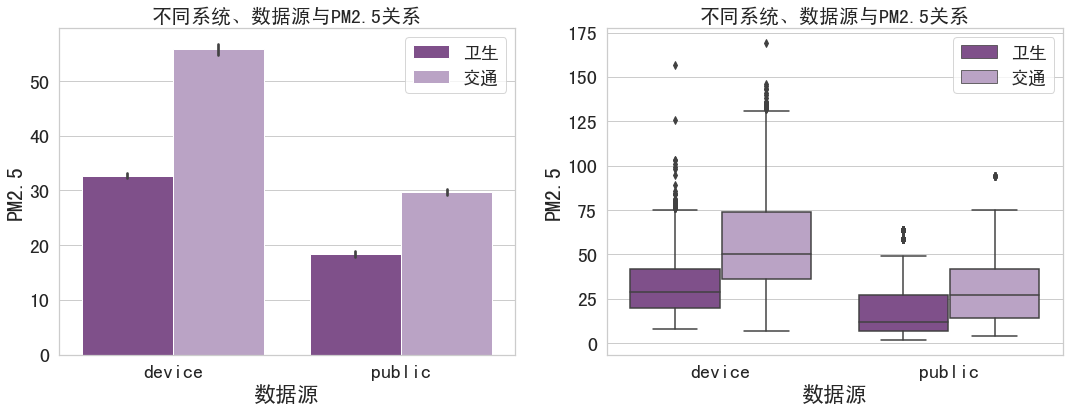

In [106]:
plt.figure(figsize=(18,6))
sns.set_palette('PRGn')
ax[0]=plt.subplot(121)
sns.barplot(x='Info_source',y='PM2.5',hue='Type',data=data_df,ax=ax[0])
ax[0].set_xlabel('数据源',fontsize=22)
ax[0].set_ylabel('PM2.5',fontsize=22)
ax[0].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('不同系统、数据源与PM2.5关系',fontsize=20)

ax[1]=plt.subplot(122)
sns.boxplot(x='Info_source',y='PM2.5',hue='Type',data=data_df,ax=ax[1])
ax[1].set_xlabel('数据源',fontsize=22)
ax[1].set_ylabel('PM2.5',fontsize=22)
ax[1].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('不同系统、数据源与PM2.5关系',fontsize=20)
# plt.savefig('不同系统、数据源与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '交通：不同区域、数据源与PM10关系')

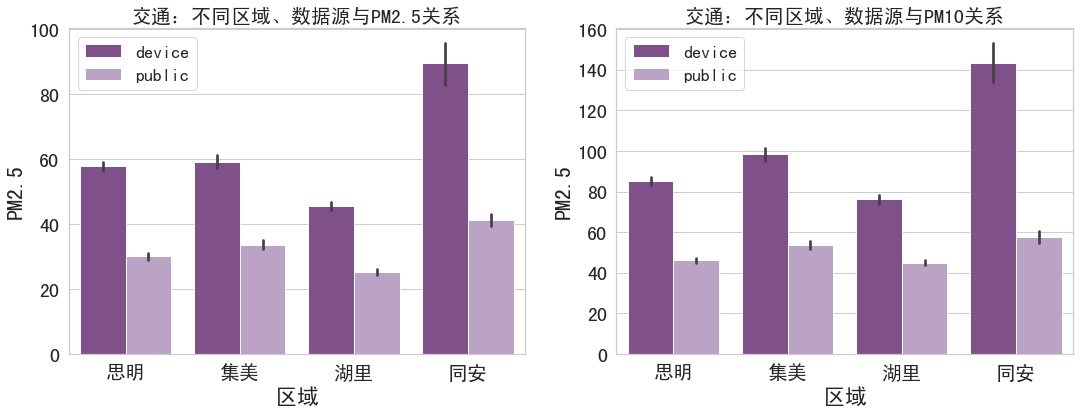

In [107]:
"""同一系统条件下，不同区域zone的测量数据与平均值PM2.5/10的比较"""
#先进行交通traffic的比较

plt.figure(figsize=(18,6))
sns.set_palette('PRGn')
ax[0]=plt.subplot(121)
ax[0]=sns.barplot(x='Zone',y='PM2.5',hue='Info_source',data=traffic,ax=ax[0])
ax[0].set_xlabel('区域',fontsize=22)
ax[0].set_ylabel('PM2.5',fontsize=22)
ax[0].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、数据源与PM2.5关系',fontsize=20)


ax[1]=plt.subplot(122)
sns.barplot(x='Zone',y='PM10',hue='Info_source',data=traffic,ax=ax[1])
ax[1].set_xlabel('区域',fontsize=22)
ax[1].set_ylabel('PM2.5',fontsize=22)
ax[1].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、数据源与PM10关系',fontsize=20)
# plt.savefig('交通：不同区域、数据源与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '卫生：不同区域、数据源与PM10关系')

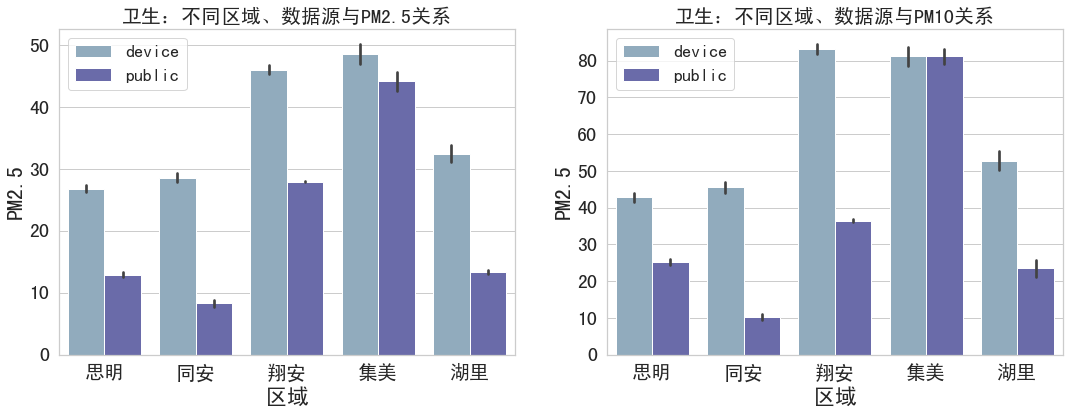

In [108]:
plt.figure(figsize=(18,6))
# sns.set_palette('BuPu')
# sns.set_palette('terrain')
sns.set_palette('twilight')
ax[0]=plt.subplot(121)
ax[0]=sns.barplot(x='Zone',y='PM2.5',hue='Info_source',data=hygiene,ax=ax[0])
ax[0].set_xlabel('区域',fontsize=22)
ax[0].set_ylabel('PM2.5',fontsize=22)
ax[0].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同区域、数据源与PM2.5关系',fontsize=20)

ax[1]=plt.subplot(122)
sns.barplot(x='Zone',y='PM10',hue='Info_source',data=hygiene,ax=ax[1])
ax[1].set_xlabel('区域',fontsize=22)
ax[1].set_ylabel('PM2.5',fontsize=22)
ax[1].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同区域、数据源与PM10关系',fontsize=20)
# plt.savefig('卫生：不同区域、数据源与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '交通：不同区域、时段与PM2.5关系')

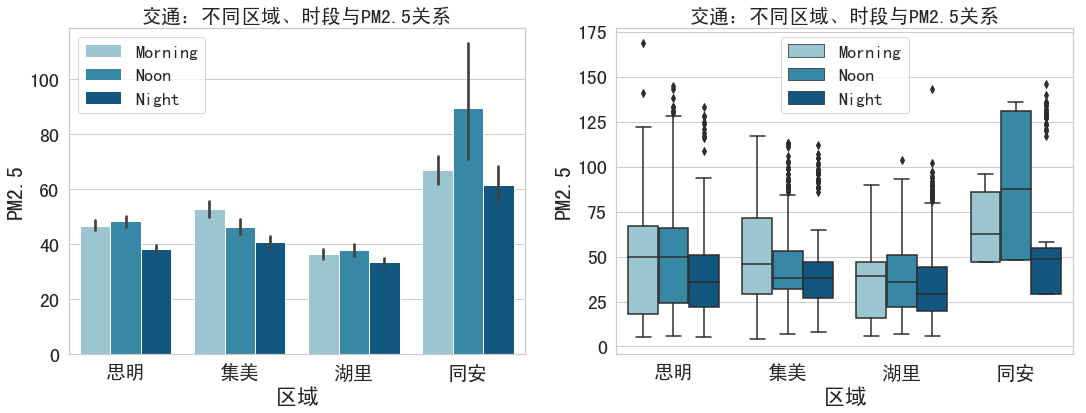

In [109]:
"""同一系统下，同一区域，不同时间段测量的数据的平均值PM2.5/10比较"""
plt.figure(figsize=(18,6))
sns.set_palette('ocean_r')
ax[0]=plt.subplot(121)
ax[0]=sns.barplot(x='Zone',y='PM2.5',hue='Time_Tags',data=traffic,ax=ax[0],ci=95)
ax[0].set_xlabel('区域',fontsize=22)
ax[0].set_ylabel('PM2.5',fontsize=22)
ax[0].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、时段与PM2.5关系',fontsize=20)

ax[1]=plt.subplot(122)
sns.boxplot(x='Zone',y='PM2.5',hue='Time_Tags',data=traffic,ax=ax[1])
ax[1].set_xlabel('区域',fontsize=22)
ax[1].set_ylabel('PM2.5',fontsize=22)
ax[1].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、时段与PM2.5关系',fontsize=20)
# plt.savefig('交通：不同区域、时段与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '卫生：不同区域、时段与PM2.5关系')

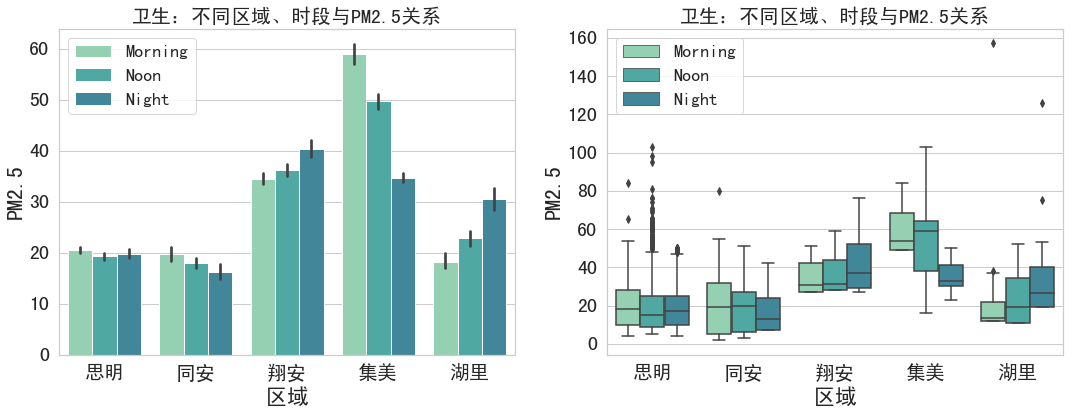

In [110]:
"""同一系统下，同一区域，不同时间段测量的数据的平均值PM2.5/10比较"""
plt.figure(figsize=(18,6))
sns.set_palette('mako_r')
ax[0]=plt.subplot(121)
ax[0]=sns.barplot(x='Zone',y='PM2.5',hue='Time_Tags',data=hygiene,ax=ax[0],ci=95)
ax[0].set_xlabel('区域',fontsize=22)
ax[0].set_ylabel('PM2.5',fontsize=22)
ax[0].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同区域、时段与PM2.5关系',fontsize=20)

ax[1]=plt.subplot(122)
sns.boxplot(x='Zone',y='PM2.5',hue='Time_Tags',data=hygiene,ax=ax[1])
ax[1].set_xlabel('区域',fontsize=22)
ax[1].set_ylabel('PM2.5',fontsize=22)
ax[1].legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同区域、时段与PM2.5关系',fontsize=20)
# plt.savefig('卫生：不同区域、时段与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '交通：不同区域、时段与PM2.5数值分布关系图')

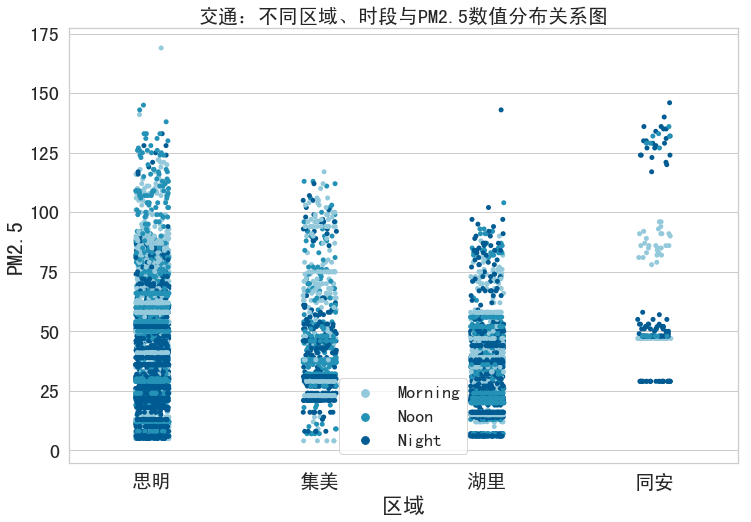

In [111]:
# fig,ax=plt.subplots(1,2,figsize=(18,6))
plt.figure(figsize=(12,8))
sns.set_palette('ocean_r')
# sns.swarmplot(x='Zone',y='PM2.5',hue='Time_Tags',data=traffic,ax=ax[0],palette='ocean_r')

ax=sns.stripplot(x='Zone',y='PM2.5',hue='Time_Tags',jitter=True,data=traffic)
ax.set_xlabel('区域',fontsize=22)
ax.set_ylabel('PM2.5',fontsize=22)
ax.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、时段与PM2.5数值分布关系图',fontsize=20)
# plt.savefig('交通：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=400)

Text(0.5, 1.0, '交通：PM2.5与PM10相关性')

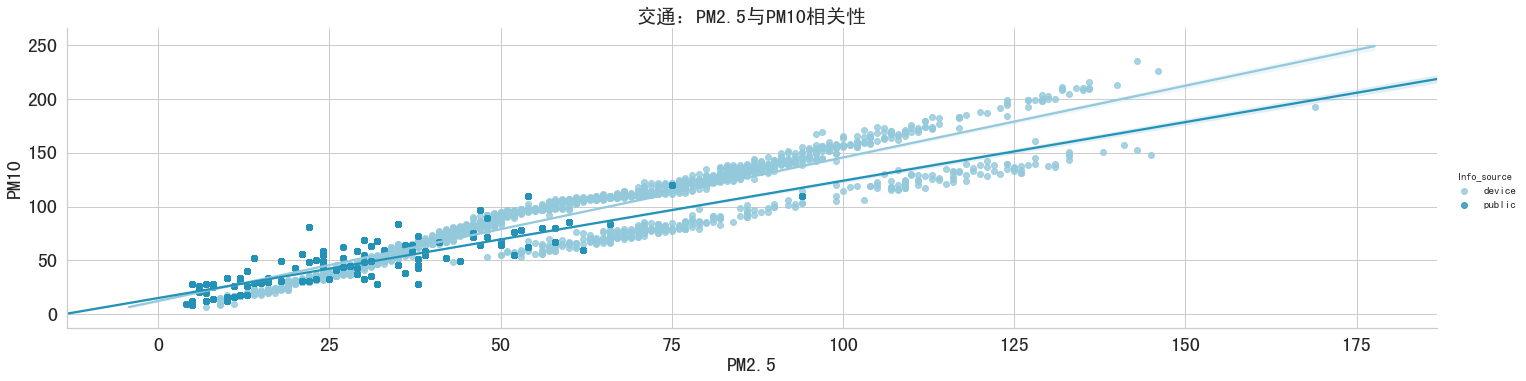

In [112]:
"""对交通数据的PM2.5和PM10的相关性做回归处理"""
# plt.figure(figsize=(18,8))
sns.lmplot(x='PM2.5',y='PM10',data=traffic,hue='Info_source',aspect=4)
plt.xlabel('PM2.5',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('PM10',fontsize=20)
plt.title('交通：PM2.5与PM10相关性',fontsize=20)

Text(0.5, 1.0, '卫生：PM2.5与PM10相关性')

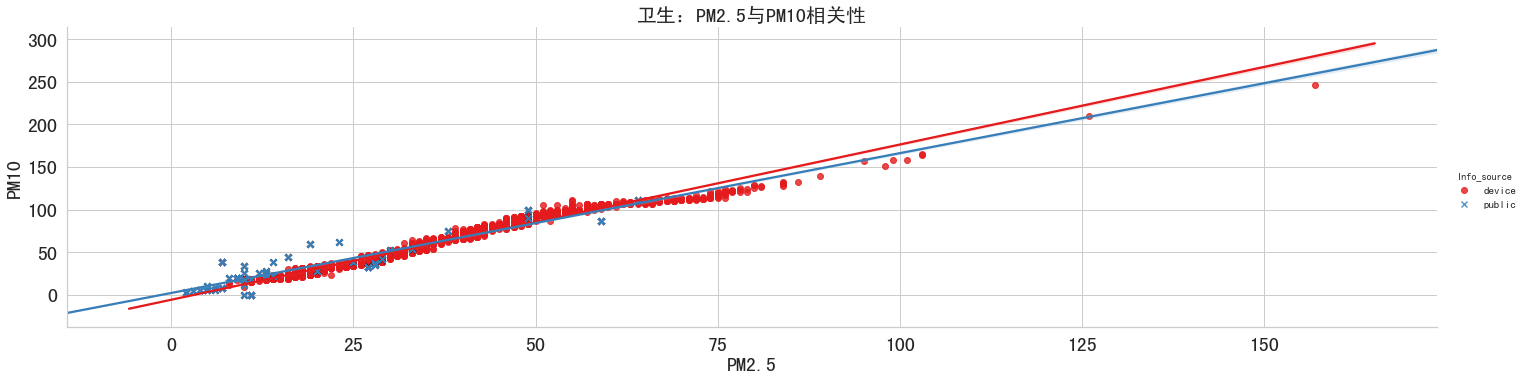

In [113]:
"""对卫生数据的PM2.5和PM10的相关性做回归处理"""
sns.lmplot(x='PM2.5',y='PM10',data=hygiene,hue='Info_source',aspect=4,palette='Set1',markers=["o", "x"])
plt.xlabel('PM2.5',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('PM10',fontsize=20)
plt.title('卫生：PM2.5与PM10相关性',fontsize=20)

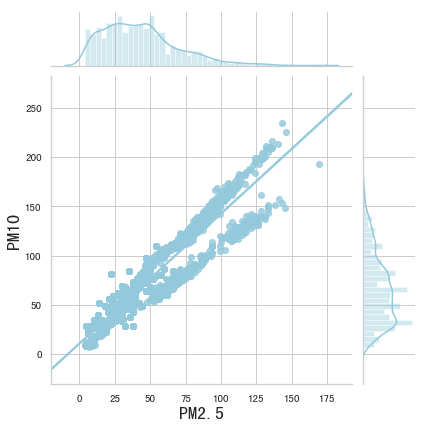

In [114]:
"""不同系统下，PM2.5和PM10的联合分布图"""

g = sns.jointplot(x='PM2.5', y='PM10',
                      data=traffic, kind="reg", 
                       
                      color=None, size=6, ratio=5, 
                      space=.2, dropna=True, xlim=None, 
                      ylim=None, joint_kws=None, 
                      marginal_kws=None, annot_kws=None)
g.set_axis_labels('PM2.5','PM10',fontsize=18)


Text(0.5, 32.49999999999995, 'Traffic:Report joint dist')

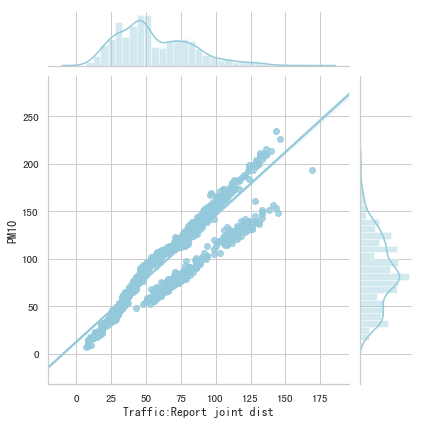

In [115]:
g = sns.jointplot(x='PM2.5', y='PM10',
                      data=traffic_device, kind="reg", 
           
                      color=None, size=6, ratio=5, 
                      space=.2, dropna=True, xlim=None, 
                      ylim=None, joint_kws=None, 
                      marginal_kws=None, annot_kws=None)
# plt.title('ddfd',loc='left',fontsize=18)
plt.xlabel('Traffic:Report joint dist')

Text(0.5, 0, '#4 卫生：发布：PM2.5超标占比')

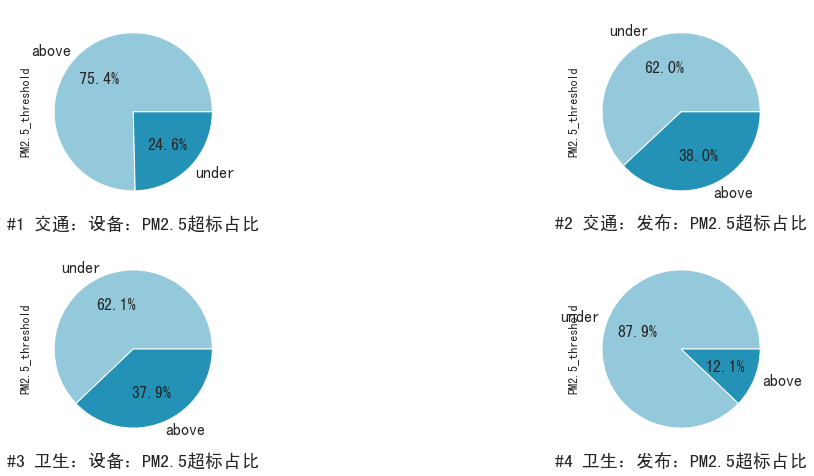

In [116]:
"""同一系统下，发布数据与测量数据中，PM2.5超标的占比"""
plt.figure(figsize=(18,8))
plt.subplot(221)
traffic_device['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('#1 交通：设备：PM2.5超标占比',fontsize=18)
plt.subplot(222)
traffic_public['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('#2 交通：发布：PM2.5超标占比',fontsize=18)
plt.subplot(223)
hygiene_device['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('#3 卫生：设备：PM2.5超标占比',fontsize=18)
plt.subplot(224)
hygiene_public['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('#4 卫生：发布：PM2.5超标占比',fontsize=18)
# plt.savefig('同一系统下，发布数据与测量数据中，PM2.5超标的占比.jpg',dpi=400)

Text(0.5, 0, 'H#3 卫生：晚：测试数据')

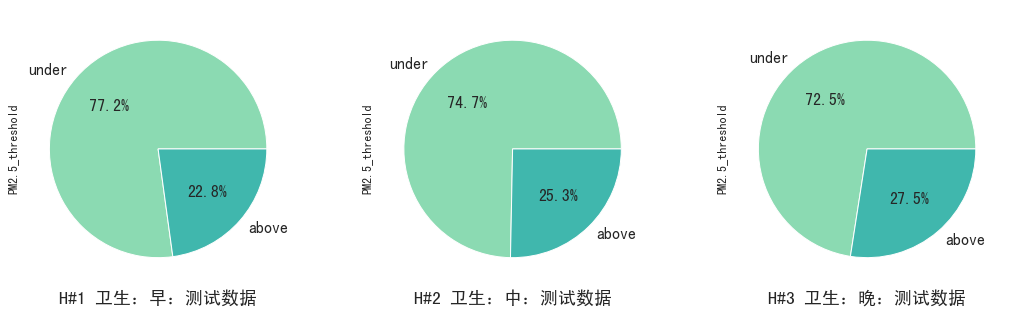

In [117]:
# 卫生系统： 不同时间段，发布数据与测量数据中，PM2.5超标的占比
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.set_palette('mako_r')
hygiene[hygiene['Time_Tags']=='Morning']['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('H#1 卫生：早：测试数据',fontsize=18)
plt.subplot(132)
hygiene[hygiene['Time_Tags']=='Noon']['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('H#2 卫生：中：测试数据',fontsize=18)
plt.subplot(133)
hygiene[hygiene['Time_Tags']=='Night']['PM2.5_threshold'].value_counts().plot.pie( autopct = '%1.1f%%',fontsize=16)
plt.xlabel('H#3 卫生：晚：测试数据',fontsize=18)

Text(0.5, 1.0, '卫生：不同数据源、时段与PM2.5关系')

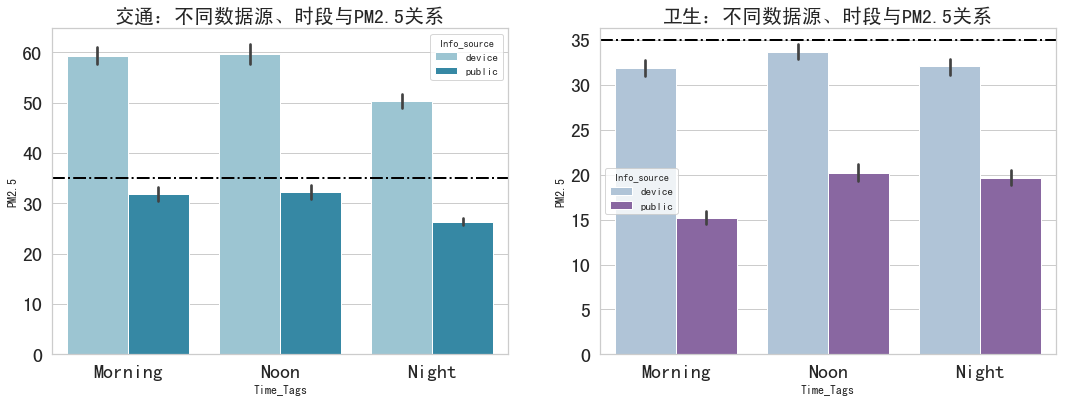

In [118]:
"""同一系统下，不同时间段，发布数据与测量数据中，PM2.5/10的对比"""

plt.figure(figsize=(18,6))
# sns.set_palette('YlGnBu')
sns.set_palette('ocean_r')
plt.subplot(121)
sns.barplot(x='Time_Tags',y='PM2.5',hue='Info_source',data=traffic)
# plt.set_xlabel('时段',fontsize=22)
# sns.set_ylabel('PM2.5',fontsize=22)
# sns.legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同数据源、时段与PM2.5关系',fontsize=20)


plt.subplot(122)
sns.barplot(x='Time_Tags',y='PM2.5',hue='Info_source',data=hygiene,palette='BuPu')
# ax[1].set_xlabel('时段',fontsize=22)
# ax[1].set_ylabel('PM2.5',fontsize=22)
# ax[1].legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同数据源、时段与PM2.5关系',fontsize=20)
# plt.savefig('不同数据源、时段与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '卫生：不同数据源、温度区间与PM2.5关系')

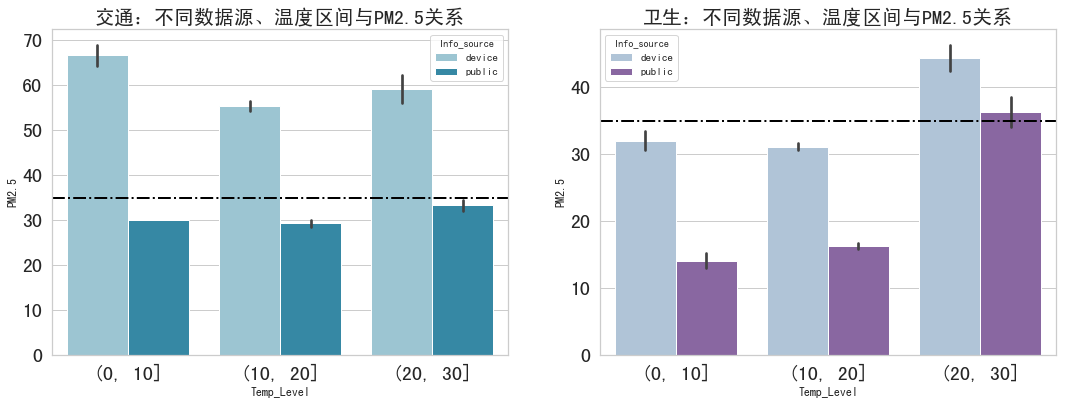

In [119]:
"""同一系统，不同温度区间下，测量/发布的PM2.5/10的数值的数值比较"""


plt.figure(figsize=(18,6))
# sns.set_palette('YlGnBu')
sns.set_palette('ocean_r')
plt.subplot(121)
sns.barplot(x='Temp_Level',y='PM2.5',hue='Info_source',data=traffic)
# ax[0].set_xlabel('温度区间/℃',fontsize=22)
# ax[0].set_ylabel('PM2.5',fontsize=22)
# ax[0].legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同数据源、温度区间与PM2.5关系',fontsize=20)


plt.subplot(122)
sns.barplot(x='Temp_Level',y='PM2.5',hue='Info_source',data=hygiene,palette='BuPu')
# ax[1].set_xlabel('温度区间/℃',fontsize=22)
# ax[1].set_ylabel('PM2.5',fontsize=22)
# ax[1].legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同数据源、温度区间与PM2.5关系',fontsize=20)
# plt.savefig('不同数据源、温度区间与PM2.5关系.jpg',dpi=400)

Text(0.5, 1.0, '卫生：不同数据源、温度区间与PM2.5关系')

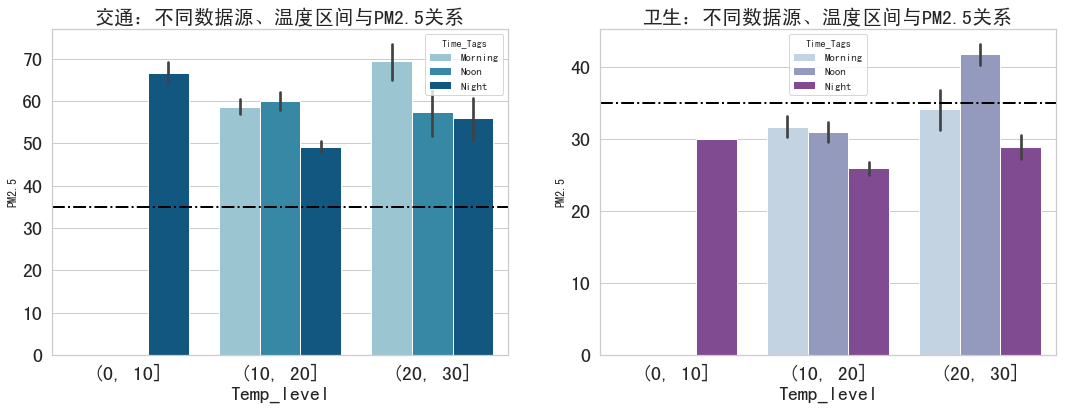

In [120]:
"""同一系统，不同温度区间下，不同时段，测量/发布的PM2.5/10的数值的数值比较"""

plt.figure(figsize=(18,6))
# sns.set_palette('YlGnBu')
sns.set_palette('ocean_r')
plt.subplot(121)
sns.barplot(x='Temp_Level',y='PM2.5',hue='Time_Tags',data=traffic_device)
# ax[0].set_xlabel('温度区间/℃',fontsize=22)
# ax[0].set_ylabel('PM2.5',fontsize=22)
# ax[0].legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Temp_level',fontsize=20)
plt.title('交通：不同数据源、温度区间与PM2.5关系',fontsize=20)


plt.subplot(122)
sns.barplot(x='Temp_Level',y='PM2.5',hue='Time_Tags',data=traffic_public,palette='BuPu')
# ax[1].set_xlabel('温度区间/℃',fontsize=22)
# ax[1].set_ylabel('PM2.5',fontsize=22)
# ax[1].legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Temp_level',fontsize=20)
plt.title('卫生：不同数据源、温度区间与PM2.5关系',fontsize=20)
# plt.savefig('不同数据源、温度区间与PM2.5关系.jpg',dpi=400)


Text(0.5, 1.0, '不同时段、温度区间与PM2.5关系')

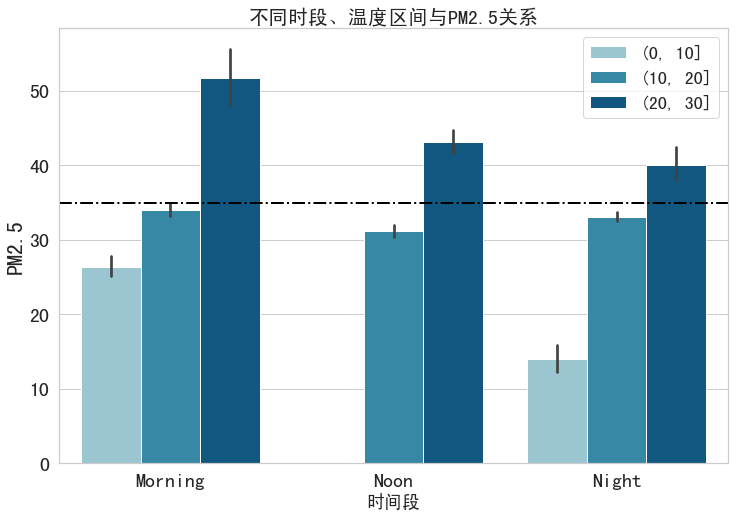

In [121]:
plt.figure(figsize=(12,8))
ax =sns.barplot(x='Time_Tags',y='PM2.5',hue='Temp_Level',data=data_df)
ax.set_xlabel('时间段',fontsize=18)
ax.legend(fontsize=18)
ax.set_ylabel('PM2.5',fontsize=22)
ax.legend(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('不同时段、温度区间与PM2.5关系',fontsize=20)

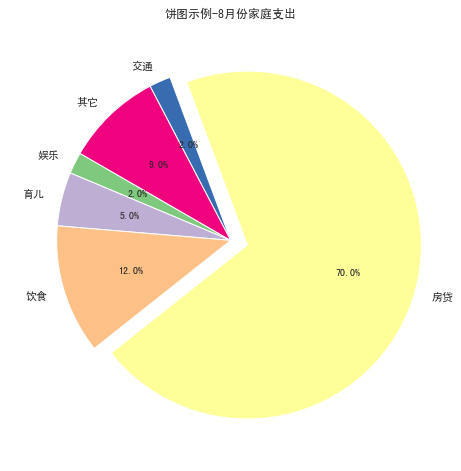

In [122]:
sns.set_palette('Accent')
plt.figure(figsize=(12,8))
labels = ['娱乐','育儿','饮食','房贷','交通','其它']
sizes = [2,5,12,70,2,9]
explode = (0,0,0,0.1,0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("饼图示例-8月份家庭支出")
plt.show()  

ValueError: color kwarg must have one color per data set. 1605 data sets and 1 colors were provided

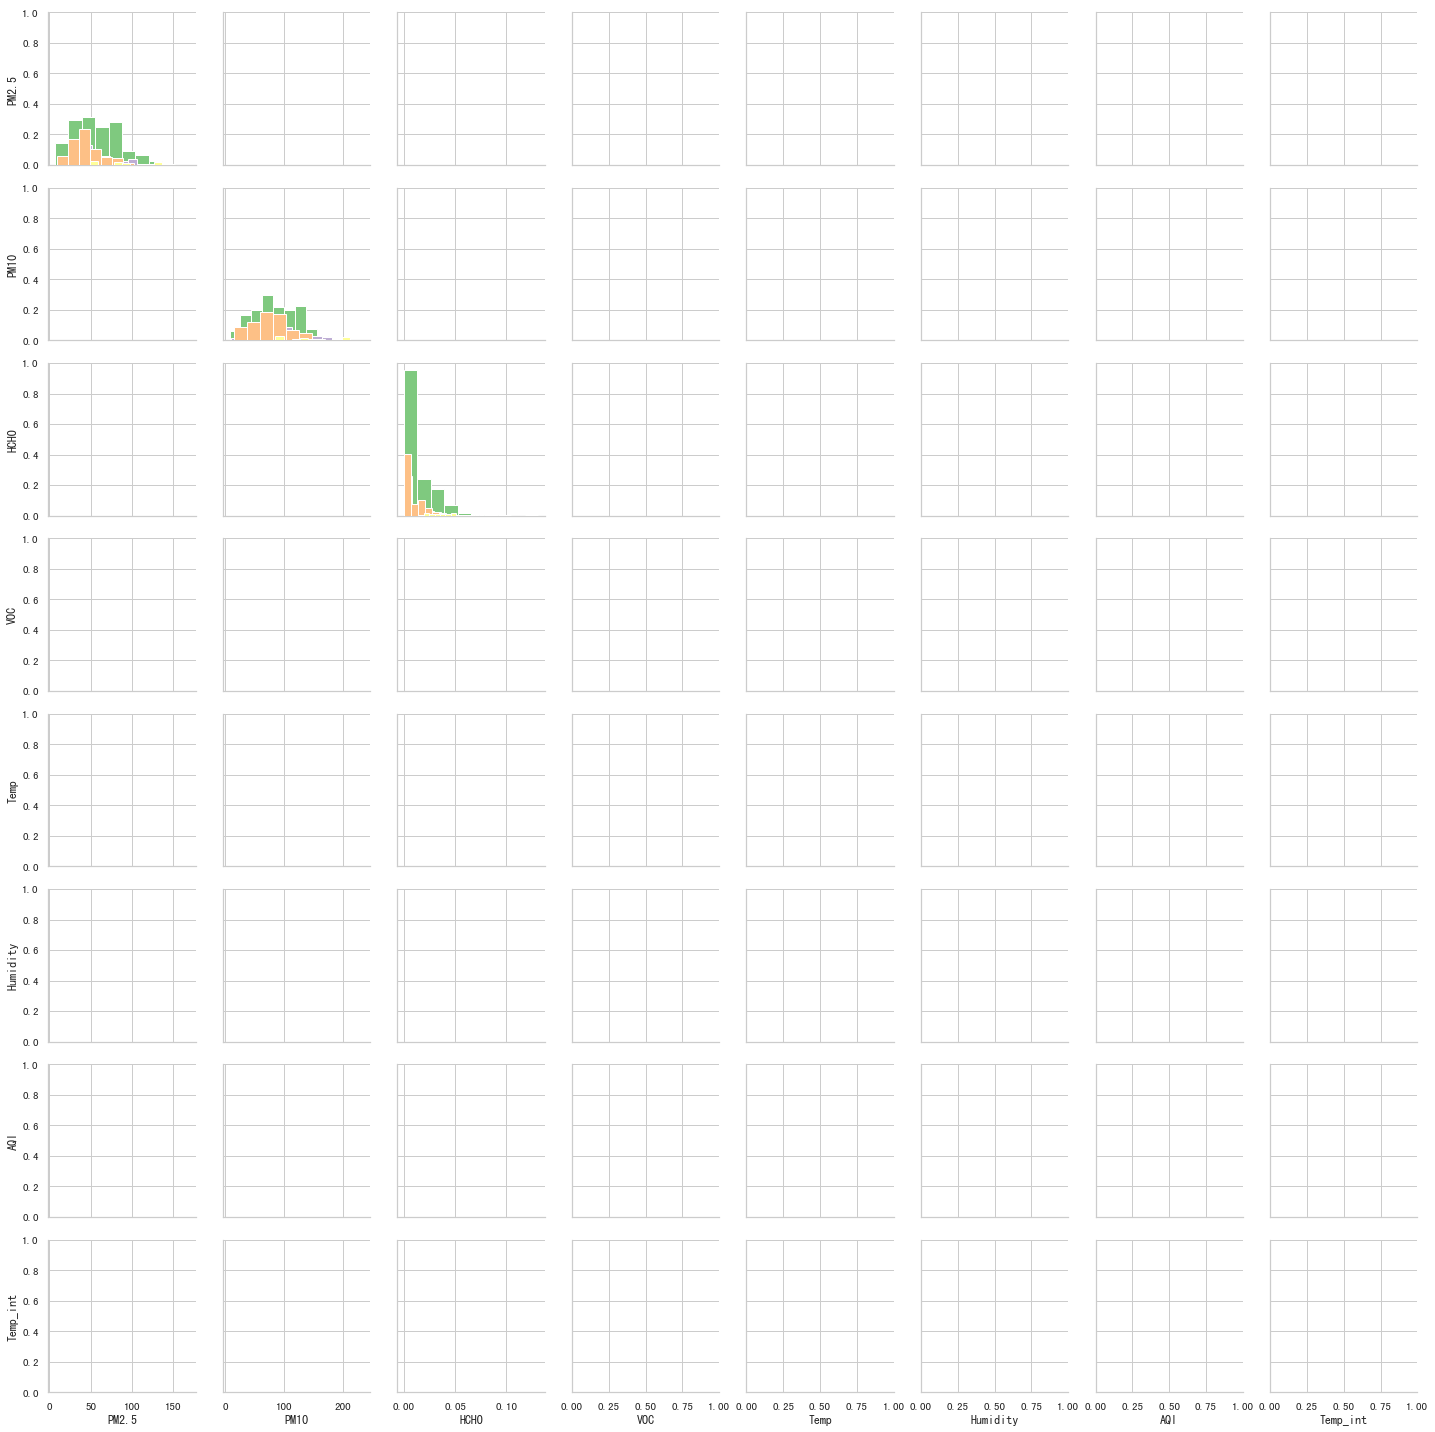

In [123]:
g = sns.PairGrid(traffic_device, hue="Zone")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
# g.savefig('ddd.jpg',dpi=800)

## 4. 特征工程

In [ ]:
data_df.info()

## 4.1 缺失值填充

In [92]:
data_df['Title'] = data_df.Title.fillna('U0') # data_df.Title[data_df.Title.isnull()]='U0'

In [94]:
data_df['O3'] = data_df['O3'].convert_objects(convert_numeric=True)
data_df['VOC'] = data_df['VOC'].convert_objects(convert_numeric=True)
data_df['Temp_int'] = data_df['Temp_int'].convert_objects(convert_numeric=True)

In [96]:
data_df['Wind_Orient'] = pd.factorize(data_df['Wind_Orient'])[0]
data_df['Wind_Level'] = pd.factorize(data_df['Wind_Level'])[0]
data_df['Zone'] = pd.factorize(data_df['Zone'])[0]
data_df['Type'] = pd.factorize(data_df['Type'])[0]
data_df['Info_source'] = pd.factorize(data_df['Info_source'])[0]
data_df['PM2.5_level'] = pd.factorize(data_df['PM2.5_level'])[0]
data_df['Temp_Level'] = pd.factorize(data_df['Temp_Level'])[0]
data_df['PM2.5_threshold'] = pd.factorize(data_df['PM2.5_threshold'])[0]
data_df['Time_Tags'] = pd.factorize(data_df['Time_Tags'])[0]
data_df['Day_tags'] = pd.factorize(data_df['Day_tags'])[0]

In [87]:
data_process = data_df.drop(['Location','Date','Title'],axis=1)

In [88]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12574 entries, 0 to 12573
Data columns (total 20 columns):
PM2.5              12574 non-null int64
PM10               12574 non-null int64
HCHO               12574 non-null float64
VOC                12572 non-null float64
O3                 12514 non-null float64
Temp               12574 non-null int64
Humidity           12574 non-null int64
AQI                12574 non-null int64
Wind_Orient        12574 non-null int64
Wind_Level         12574 non-null int64
Type               12574 non-null int64
Zone               12574 non-null int64
Time               12574 non-null object
Info_source        12574 non-null int64
PM2.5_level        12574 non-null int64
Temp_Level         12574 non-null int64
PM2.5_threshold    12574 non-null int64
Time_Tags          12574 non-null int64
Day_tags           12574 non-null int64
Temp_int           12574 non-null int64
dtypes: float64(3), int64(16), object(1)
memory usage: 1.9+ MB


In [89]:
data_process.columns

Index(['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'Type', 'Zone', 'Time', 'Info_source',
       'PM2.5_level', 'Temp_Level', 'PM2.5_threshold', 'Time_Tags', 'Day_tags',
       'Temp_int'],
      dtype='object')

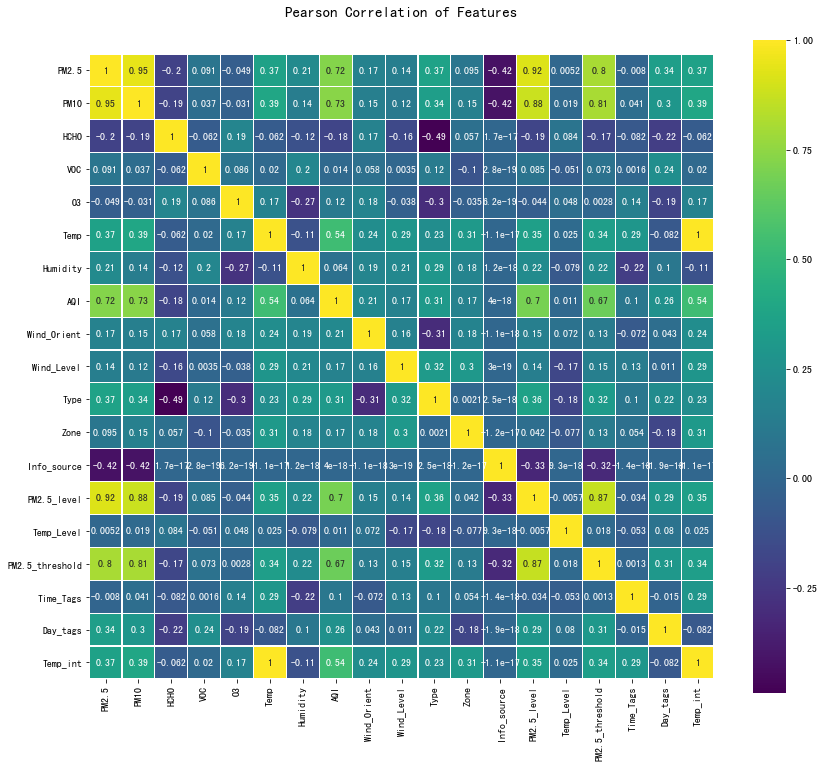

In [90]:
Correlation = pd.DataFrame(data_process[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'Type', 'Zone', 'Info_source',
       'PM2.5_level', 'Temp_Level', 'PM2.5_threshold', 'Time_Tags', 'Day_tags',
       'Temp_int']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [92]:
data_process_hygiene = data_process[data_process['Type']==0]

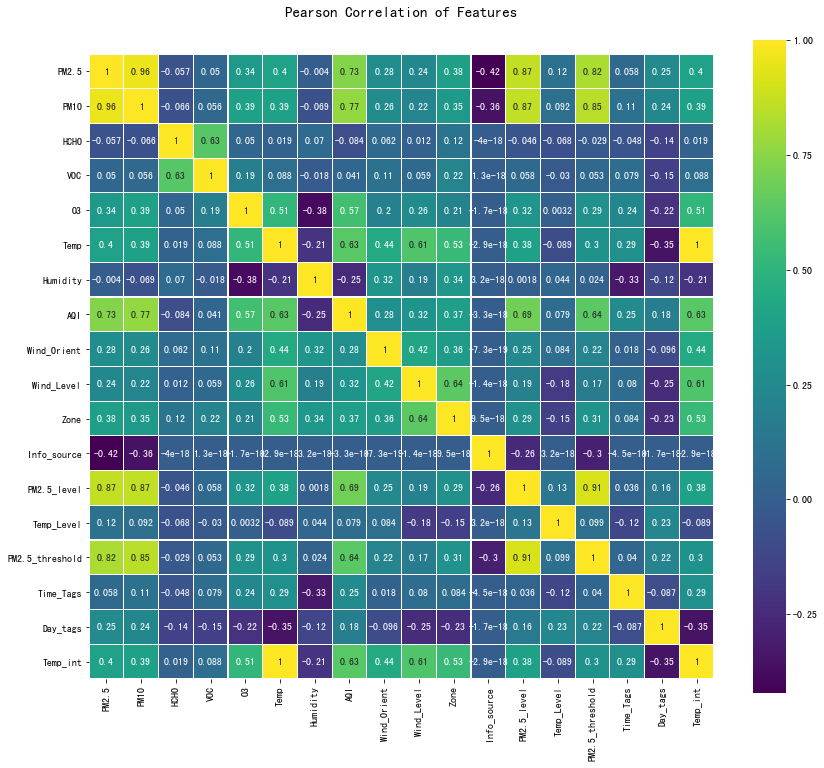

In [93]:
Correlation = pd.DataFrame(data_process_hygiene[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'Zone', 'Info_source',
       'PM2.5_level', 'Temp_Level', 'PM2.5_threshold', 'Time_Tags', 'Day_tags',
       'Temp_int']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [94]:
data_process_hygiene = data_process[data_process['Type']==1]

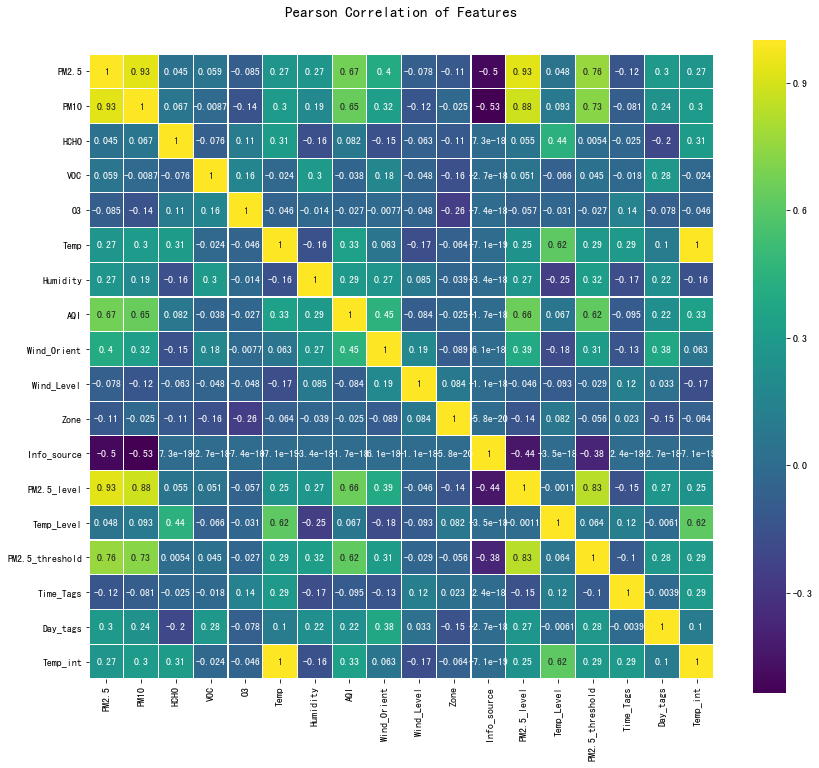

In [95]:
"""全区域：卫生各采集要素之间相关性统计结果"""
Correlation = pd.DataFrame(data_process_hygiene[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'Zone', 'Info_source',
       'PM2.5_level', 'Temp_Level', 'PM2.5_threshold', 'Time_Tags', 'Day_tags',
       'Temp_int']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


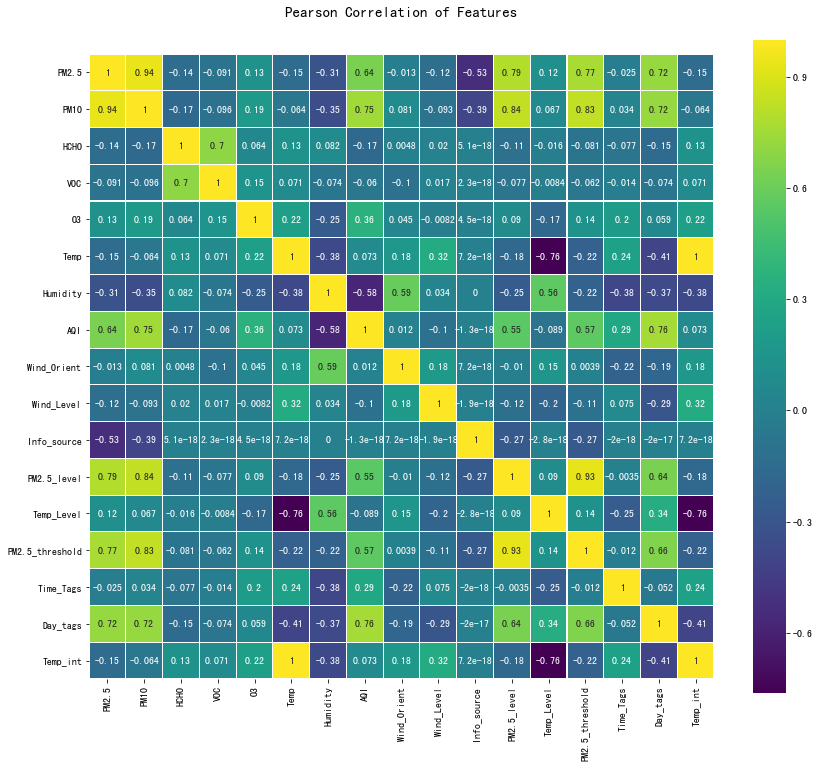

In [96]:
"""思明区：卫生系统各采集要素之间相关性统计结果"""
data_process_hygiene_siming = data_process[(data_process['Type']==0)&(data_process['Zone']==0)]

Correlation = pd.DataFrame(data_process_hygiene_siming[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level',  'Info_source',
       'PM2.5_level', 'Temp_Level', 'PM2.5_threshold', 'Time_Tags', 'Day_tags',
       'Temp_int']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


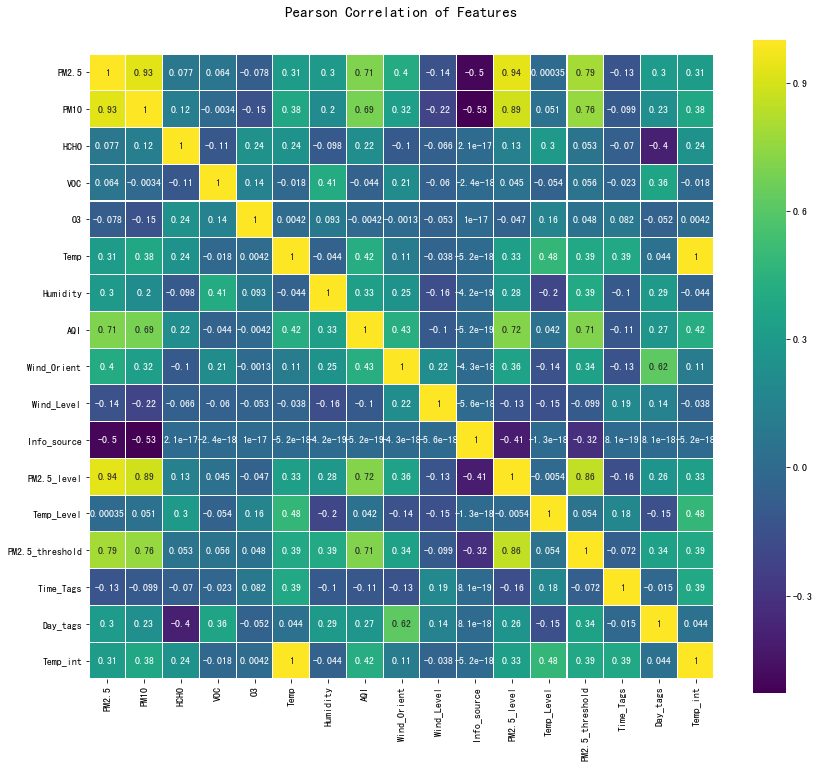

In [97]:
"""思明区：交通各采集要素之间相关性统计结果"""
data_process_traffic_siming = data_process[(data_process['Type']==1)&(data_process['Zone']==0)]

Correlation = pd.DataFrame(data_process_traffic_siming[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level',  'Info_source',
       'PM2.5_level', 'Temp_Level', 'PM2.5_threshold', 'Time_Tags', 'Day_tags',
       'Temp_int']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


# 5. 建立模型

## 5.1 训练集和验证集划分

In [98]:
# os.chdir("/Users/lin/Desktop/Desktop/fastai-master/courses")

In [101]:
os.makedirs('tmp', exist_ok=True)
data_df.to_feather('tmp/PM25-raw')

In [97]:
import feather
os.chdir('/Users/lin/Desktop/Air_detecting')
os.makedirs('tmp', exist_ok=True)
data_df.to_feather('tmp/PM25-raw')

In [98]:
data_df.columns

Index(['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'Location', 'Type', 'Zone', 'Date', 'Time',
       'Info_source', 'PM2.5_level', 'Temp_Level', 'PM2.5_threshold',
       'Time_Tags', 'Day_tags', 'Title', 'Temp_int'],
      dtype='object')

/Users/lin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


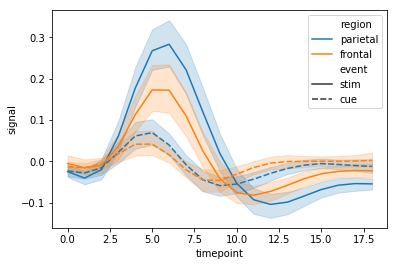

In [5]:
import seaborn as sns

fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


In [98]:
print(sns.__version__)

0.8.0


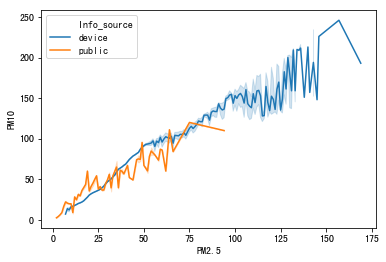

In [27]:
sns.lineplot(x='PM2.5',y='PM10',hue='Info_source',data=data_df)

In [6]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


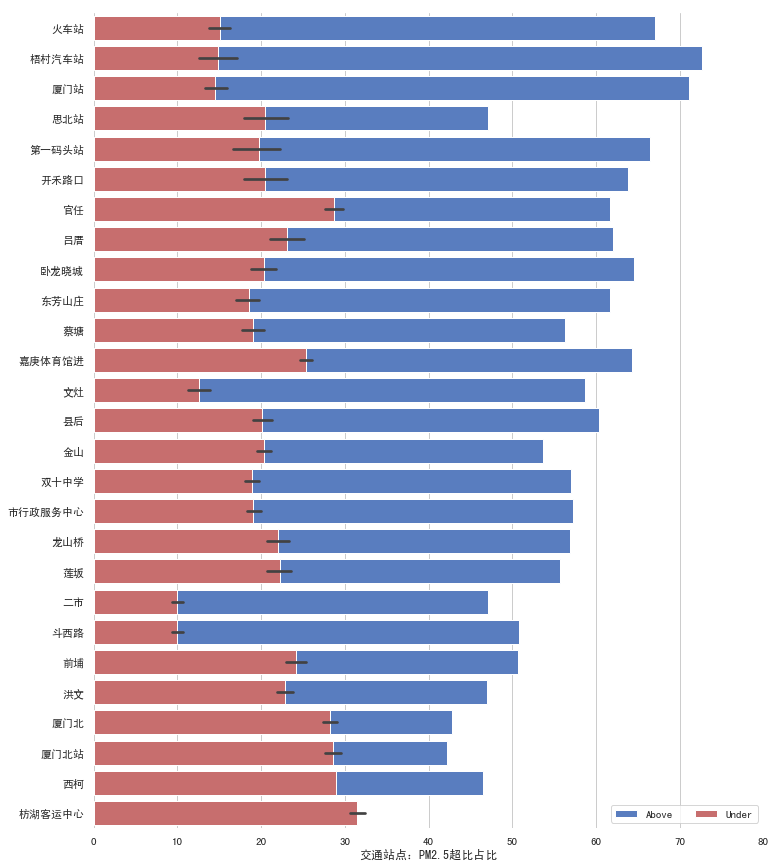

In [141]:
f, ax = plt.subplots(figsize=(12, 15))
sns.barplot(x="PM2.5", y="Title", ci=None,data=traffic[traffic['PM2.5']>35].sort_values(by='PM2.5',ascending=False),
            label="Above", color="b")
sns.barplot(x="PM2.5", y="Title", data=traffic[traffic['PM2.5']<35],
            label="Under", color="r")

# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.legend(ncol=2, loc="best", frameon=True)

ax.set(xlim=(0, 80), ylabel="",
       xlabel="交通站点：PM2.5超比占比")
sns.despine(left=True, bottom=True)

In [140]:
traffic[traffic['PM2.5']>35].sort_values(by='PM2.5',ascending=False)

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags,Day_tags,Title
2111,169,193,0.000,0.57,29,16,85,68,东南风,微风,...,思明,2019-03-02,08:19:00,device,Terrible,"(10, 20]",above,Morning,R,斗西路
4246,146,226,0.055,0.17,11,22,69,66,北风,3-4级,...,同安,2018-12-23,11:28:00,device,Terrible,"(20, 30]",above,Night,R,西柯
2202,145,148,0.000,0.16,12,18,77,81,东南风,微风,...,思明,2019-03-02,12:05:00,device,Terrible,"(10, 20]",above,Noon,R,NaN
2192,143,153,0.000,0.17,12,18,77,81,东南风,微风,...,思明,2019-03-02,11:53:00,device,Terrible,"(10, 20]",above,Noon,R,思北站
3230,143,235,0.052,0.132,19,21,72,59,东北风,3-4级,...,湖里,2018-12-11,11:17:00,device,Terrible,"(20, 30]",above,Night,W,吕厝
2129,141,157,0.010,0.16,29,16,85,68,东南风,微风,...,思明,2019-03-02,08:39:00,device,Terrible,"(10, 20]",above,Morning,R,思北站
4227,140,213,0.047,0.157,11,22,69,66,北风,3-4级,...,同安,2018-12-23,11:09:00,device,Terrible,"(20, 30]",above,Night,R,西柯
2201,138,151,0.000,0.17,12,18,77,81,东南风,微风,...,思明,2019-03-02,12:04:00,device,Terrible,"(10, 20]",above,Noon,R,NaN
4234,136,216,0.043,0.166,11,22,69,66,北风,3-4级,...,同安,2018-12-23,11:16:00,device,Terrible,"(20, 30]",above,Night,R,西柯
4233,136,209,0.056,0.177,11,22,69,66,北风,3-4级,...,同安,2018-12-23,11:15:00,device,Terrible,"(20, 30]",above,Night,R,西柯
